In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing and processing audio signals.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
import random

# Set seeds for reproducibility
seed_value = 42

# 1. Set Python seed
random.seed(seed_value)

# 2. Set Numpy seed
np.random.seed(seed_value)

# 3. Set TensorFlow seed
tf.random.set_seed(seed_value)


Data Preparation

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Audio Analysis


/content/drive/MyDrive/Audio Analysis


In [ ]:
# Get the current working directory
cwd = os.getcwd()

# Get a list of all the files and directories in the current working directory
contents = os.listdir(cwd)

# Print the list of contents
print(contents)

['SAVEE', 'CREMA-D', 'RAVDESS', 'TESS', 'Audio_Speech_Sentiment', 'Models', 'data_path.csv', 'features.csv', 'wave2vec']


In [ ]:
Features=pd.read_csv('features.csv')
Features

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.221711,0.717623,0.676820,0.622114,0.567222,0.530047,0.506060,0.513090,0.538911,0.587742,...,1.625823e-04,1.227060e-04,2.520911e-04,2.082695e-04,2.732483e-04,1.859348e-04,1.117308e-04,2.795662e-05,1.877223e-06,sad
1,0.306333,0.808334,0.809195,0.735504,0.693425,0.694983,0.614841,0.595060,0.609359,0.654337,...,2.740127e-04,2.288649e-04,3.629544e-04,3.177298e-04,3.879392e-04,2.939013e-04,2.258861e-04,1.410695e-04,1.102960e-04,sad
2,0.200202,0.618428,0.558264,0.555919,0.587506,0.678541,0.643793,0.560025,0.519437,0.523522,...,3.534336e-05,1.786805e-05,1.174114e-05,1.182243e-05,9.551801e-06,1.264313e-05,1.228576e-05,1.044788e-05,7.289458e-07,sad
3,0.180614,0.484732,0.403829,0.449593,0.510690,0.473447,0.472625,0.470697,0.535387,0.645654,...,2.042610e-05,4.280592e-05,1.985392e-05,1.054747e-05,6.596223e-06,1.057199e-05,5.627526e-06,2.074922e-06,2.938744e-07,sad
4,0.257428,0.611021,0.566790,0.617001,0.670517,0.640898,0.588802,0.554699,0.604893,0.697609,...,7.113000e-05,9.004290e-05,7.025031e-05,5.700416e-05,5.787766e-05,6.094981e-05,5.690050e-05,5.095462e-05,5.109764e-05,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36481,0.030332,0.628117,0.624942,0.596301,0.480619,0.466382,0.528422,0.565323,0.576542,0.573873,...,8.153068e-07,8.291537e-07,8.351180e-07,7.875340e-07,7.679594e-07,8.005923e-07,8.275033e-07,8.177092e-07,8.067297e-07,neutral
36482,0.036598,0.509419,0.505649,0.609432,0.552910,0.542113,0.531851,0.522220,0.445416,0.355434,...,6.088640e-07,5.016910e-07,3.516936e-07,1.094733e-07,8.996469e-08,3.546998e-08,1.273642e-08,6.050051e-09,3.158192e-10,neutral
36483,0.019934,0.604011,0.543243,0.477521,0.442807,0.412928,0.421630,0.510570,0.592495,0.525786,...,5.620556e-08,4.005692e-08,3.565935e-08,3.383525e-08,3.466478e-08,3.474812e-08,3.548512e-08,3.250027e-08,2.158683e-08,sad
36484,0.041838,0.698420,0.660117,0.618702,0.593643,0.575627,0.562585,0.607697,0.662594,0.600693,...,2.987277e-05,2.945807e-05,2.930258e-05,2.751308e-05,2.882735e-05,2.960830e-05,3.025193e-05,2.905682e-05,2.885426e-05,sad


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
print(X.shape,Y.shape)


(36486, 162) (36486,)


In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
#For later USE

# Get the label values back from the one-hot encoded representation
Y_decoded = encoder.inverse_transform(Y)

# Convert the decoded labels to a 1D array
Y_labels = np.squeeze(Y_decoded)

# Print the label values
print(Y_labels)

['sad' 'sad' 'sad' ... 'sad' 'sad' 'sad']


In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((27364, 162), (27364, 8), (9122, 162), (9122, 8))

#ANN  

Hyperparameter Tuning

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split

# Define the model architecture
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1)

# Define hyperparameters to search
learning_rate = [0.001,0.01,0.1]
batch_size = [32,64,128]
epochs = [50,100,150]

# Create parameter grid
param_grid = dict(learning_rate=learning_rate, batch_size=batch_size, epochs=epochs)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(x_train, y_train)

# Print the best results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # Evaluate the model with best parameters
# best_model = grid_result.best_estimator_
# train_score = best_model.score(x_train, y_train)
# print("Accuracy: %.2f%%" % (train_score * 100))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Epoch 1/50


<ipython-input-29-39e1533a0a51>:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
143/143 [==============================] - 1s 5ms/step - loss: 1.0464 - accuracy: 0.5887
Epoch 23/50
143/143 [==============================] - 1s 5ms/step - loss: 1.0532 - accuracy: 0.5854
Epoch 24/50
143/143 [==============================] - 1s 5ms/step - loss: 1.0442 - accuracy: 0.5863
Epoch 25/50
143/143 [==============================] - 1s 5ms/step - loss: 1.0374 - accuracy: 0.5904
Epoch 26/50
143/143 [==============================] - 1s 5ms/step - loss: 1.0281 - accuracy: 0.5949
Epoch 27/50
143/143 [==============================] - 1s 5ms/step - loss: 1.0237 - accuracy: 0.5942
Epoch 28/50
143/143 [==============================] - 1s 5ms/step - loss: 1.0206 - accuracy: 0.5960
Epoch 29/50
143/143 [==============================] - 1s 6ms/step - loss: 1.0209 - accuracy: 0.5954
Epoch 30/50
143/143 [==============================] - 1s 4ms/step - loss: 1.0073 - accuracy: 0.6017
Epoch 31/50
143/143 [====

In [ ]:
#Best: 0.617381 using {'batch_size': 64, 'epochs': 150, 'learning_rate': 0.01}

Model

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))



# Specified learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

# Evaluate the model
scores = model.evaluate(x_train, y_train)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/300
343/343 [==============================] - 5s 8ms/step - loss: 1.5442 - accuracy: 0.3825 - val_loss: 1.3661 - val_accuracy: 0.4471
Epoch 2/300
343/343 [==============================] - 2s 5ms/step - loss: 1.3840 - accuracy: 0.4396 - val_loss: 1.2964 - val_accuracy: 0.4701
Epoch 3/300
343/343 [==============================] - 2s 6ms/step - loss: 1.3448 - accuracy: 0.4614 - val_loss: 1.2831 - val_accuracy: 0.4835
Epoch 4/300
343/343 [==============================] - 3s 9ms/step - loss: 1.3524 - accuracy: 0.4680 - val_loss: 1.2352 - val_accuracy: 0.4961
Epoch 5/300
343/343 [==============================] - 3s 8ms/step - loss: 1.3020 - accuracy: 0.4817 - val_loss: 1.2655 - val_accuracy: 0.4953
Epoch 6/300
343/343 [==============================] - 2s 5ms/step - loss: 1.3015 - accuracy: 0.4809 - val_loss: 1.2109 - val_accuracy: 0.5127
Epoch 7/300
343/343 [==============================] - 2s 6ms/step - loss: 1.2906 - accuracy: 0.4865 - val_loss: 1.2667 - val_accuracy: 0.4847

In [ ]:
# Evaluate the model on the test data
scores = model.evaluate(x_test, y_test)
print("Test accuracy: %.2f%%" % (scores[1]*100))

286/286 [==============================] - 1s 2ms/step - loss: 1.2590 - accuracy: 0.5645
Test accuracy: 56.45%


286/286 [==============================] - 1s 2ms/step


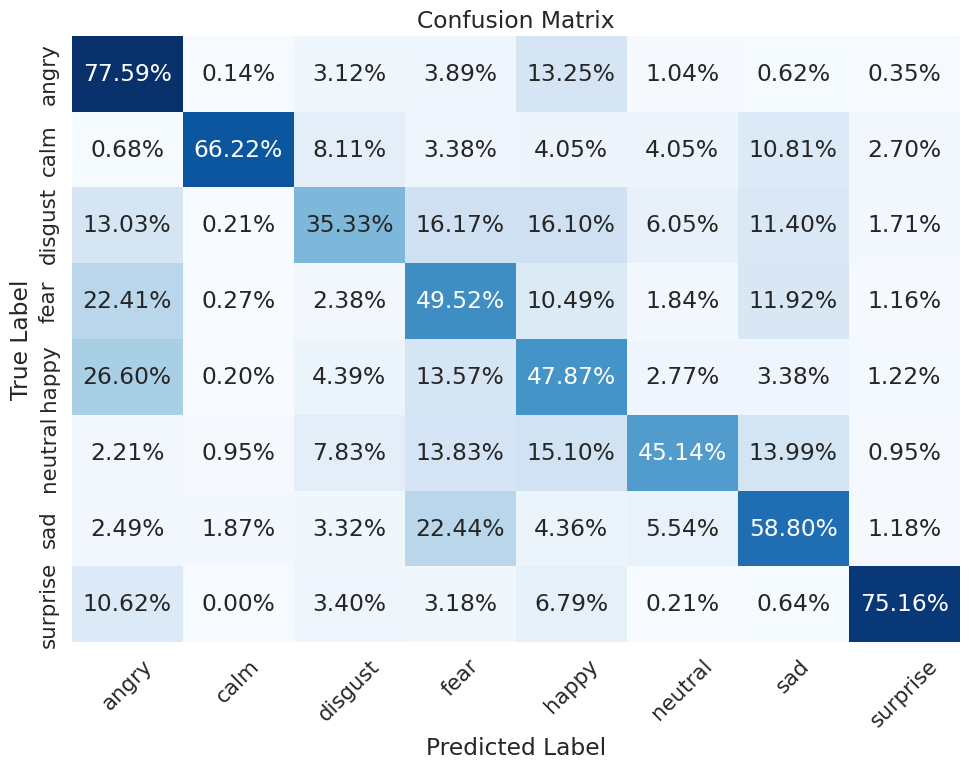

F1 Score: 0.5353
Overall Accuracy: 0.5396


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Predict the classes for the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Convert confusion matrix to percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Define class labels
class_labels = encoder.categories_[0].tolist()

# Create a figure and axes
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot layout to fit labels properly
plt.tight_layout()

# Show the plot
plt.show()

# Compute the F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Compute the overall accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print the F1 score and overall accuracy
print("F1 Score: %.4f" % f1)
print("Overall Accuracy: %.4f" % accuracy)


#CNN

Hyperparameter Tuning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create the CNN model
def create_model(lr=0.001):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(162, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=8, activation='softmax'))

    optimizer = Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Create the Keras classifier
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters to tune
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'epochs': [50,100,150],
    'batch_size': [32,64, 128],
    'verbose': [1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Train the model with hyperparameter tuning
grid_search.fit(x_train.reshape(-1, 162, 1), y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# # Train the model with the best hyperparameters
# best_model = grid_search.best_estimator_
# best_model.fit(x_train.reshape(-1, 162, 1), y_train, verbose=1)


<ipython-input-35-fd718fd3857e>:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Streaming output truncated to the last 5000 lines.
143/143 [==============================] - 1s 6ms/step - loss: 1.9608 - accuracy: 0.1614
Epoch 12/50
143/143 [==============================] - 1s 7ms/step - loss: 1.9602 - accuracy: 0.1621
Epoch 13/50
143/143 [==============================] - 1s 7ms/step - loss: 1.9599 - accuracy: 0.1550
Epoch 14/50
143/143 [==============================] - 1s 6ms/step - loss: 1.9613 - accuracy: 0.1597
Epoch 15/50
143/143 [==============================] - 1s 6ms/step - loss: 1.9605 - accuracy: 0.1595
Epoch 16/50
143/143 [==============================] - 1s 5ms/step - loss: 1.9616 - accuracy: 0.1530
Epoch 17/50
143/143 [==============================] - 1s 6ms/step - loss: 1.9614 - accuracy: 0.1549
Epoch 18/50
143/143 [==============================] - 1s 5ms/step - loss: 1.9606 - accuracy: 0.1609
Epoch 19/50
143/143 [==============================] - 1s 5ms/step - loss: 1.9602 - accuracy: 0.1561
Epoch 20/50
143/143 [==============================]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(162, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define the filepath to save the best model
checkpoint_filepath = 'best_model.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model with the callback
model.fit(
    x_train.reshape(-1, 162, 1),
    y_train,
    batch_size=128,
    epochs=100,
    validation_split=0.2,
    callbacks=[checkpoint]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


172/172 [==============================] - ETA: 0s - loss: 1.5538 - accuracy: 0.3912
Epoch 1: val_accuracy improved from -inf to 0.50996, saving model to best_model.h5
172/172 [==============================] - 9s 7ms/step - loss: 1.5538 - accuracy: 0.3912 - val_loss: 1.3198 - val_accuracy: 0.5100
Epoch 2/100
160/172 [==========================>...] - ETA: 0s - loss: 1.3273 - accuracy: 0.4791
Epoch 2: val_accuracy improved from 0.50996 to 0.52129, saving model to best_model.h5
172/172 [==============================] - 1s 4ms/step - loss: 1.3255 - accuracy: 0.4797 - val_loss: 1.2408 - val_accuracy: 0.5213
Epoch 3/100
159/172 [==========================>...] - ETA: 0s - loss: 1.2484 - accuracy: 0.5106
Epoch 3: val_accuracy improved from 0.52129 to 0.54175, saving model to best_model.h5
172/172 [==============================] - 1s 4ms/step - loss: 1.2431 - accuracy: 0.5123 - val_loss: 1.1715 - val_accuracy: 0.5418
Epoch 4/100
161/172 [===========================>..] - ETA: 0s - loss: 1.

In [ ]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test.reshape(-1, 162, 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


286/286 [==============================] - 1s 3ms/step - loss: 2.0144 - accuracy: 0.6352
Test loss: 2.014423131942749
Test accuracy: 0.6351677179336548


286/286 [==============================] - 1s 1ms/step


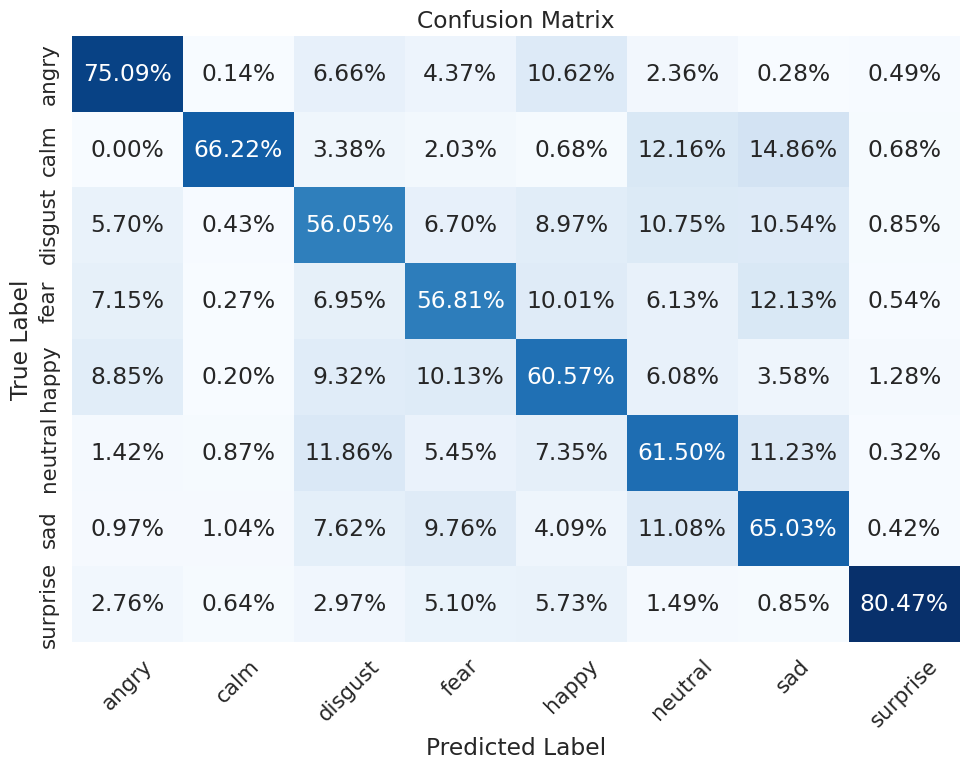

F1 Score: 0.6355
Overall Accuracy: 0.6352


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Predict the classes for the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Convert confusion matrix to percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Define class labels
class_labels = encoder.categories_[0].tolist()

# Create a figure and axes
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot layout to fit labels properly
plt.tight_layout()

# Show the plot
plt.show()

# Compute the F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Compute the overall accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print the F1 score and overall accuracy
print("F1 Score: %.4f" % f1)
print("Overall Accuracy: %.4f" % accuracy)


#LSTM


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the LSTM model
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(162, 1)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(LSTM(64, return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(LSTM(16))
    model.add(Dense(8, activation='softmax'))

    # Compile the model with the given learning rate
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the KerasClassifier wrapper
model_wrapper = KerasClassifier(build_fn=create_model)

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [50, 100, 150],
    'batch_size': [32, 64,128]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)


<ipython-input-13-151c08e92f4a>:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model)


Epoch 1/50
571/571 [==============================] - 20s 17ms/step - loss: 1.8682 - accuracy: 0.2456
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7885 - accuracy: 0.2794
Epoch 3/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7700 - accuracy: 0.2898
Epoch 4/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7605 - accuracy: 0.2913
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7406 - accuracy: 0.3028
Epoch 6/50
571/571 [==============================] - 9s 16ms/step - loss: 1.7235 - accuracy: 0.3082
Epoch 7/50
571/571 [==============================] - 9s 16ms/step - loss: 1.7277 - accuracy: 0.3092
Epoch 8/50
571/571 [==============================] - 9s 17ms/step - loss: 1.6923 - accuracy: 0.3216
Epoch 9/50
571/571 [==============================] - 9s 17ms/step - loss: 1.6658 - accuracy: 0.3328
Epoch 10/50
571/571 [==============================] - 9s 16ms/step - loss: 1.6444 - a

Epoch 1/50
571/571 [==============================] - 14s 17ms/step - loss: 1.9094 - accuracy: 0.2110
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8049 - accuracy: 0.2694
Epoch 3/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7692 - accuracy: 0.2864
Epoch 4/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7432 - accuracy: 0.2960
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7612 - accuracy: 0.2877
Epoch 6/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7025 - accuracy: 0.3150
Epoch 7/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6755 - accuracy: 0.3246
Epoch 8/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6431 - accuracy: 0.3401
Epoch 9/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6229 - accuracy: 0.3500
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.588

Epoch 1/50
571/571 [==============================] - 15s 18ms/step - loss: 1.8768 - accuracy: 0.2341
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8553 - accuracy: 0.2400
Epoch 3/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8156 - accuracy: 0.2639
Epoch 4/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7776 - accuracy: 0.2827
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8001 - accuracy: 0.2711
Epoch 6/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7564 - accuracy: 0.2895
Epoch 7/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7351 - accuracy: 0.3040
Epoch 8/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7189 - accuracy: 0.3041
Epoch 9/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6967 - accuracy: 0.3120
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.695

Epoch 1/50
571/571 [==============================] - 15s 17ms/step - loss: 1.8962 - accuracy: 0.2249
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8188 - accuracy: 0.2699
Epoch 3/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7919 - accuracy: 0.2804
Epoch 4/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7751 - accuracy: 0.2857
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7456 - accuracy: 0.3006
Epoch 6/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7185 - accuracy: 0.3119
Epoch 7/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7108 - accuracy: 0.3148
Epoch 8/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6769 - accuracy: 0.3302
Epoch 9/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6589 - accuracy: 0.3409
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.644

Epoch 1/50
571/571 [==============================] - 15s 18ms/step - loss: 1.8398 - accuracy: 0.2594
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8113 - accuracy: 0.2720
Epoch 3/50
571/571 [==============================] - 10s 18ms/step - loss: 1.7899 - accuracy: 0.2797
Epoch 4/50
571/571 [==============================] - 10s 18ms/step - loss: 1.7778 - accuracy: 0.2872
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7820 - accuracy: 0.2778
Epoch 6/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7478 - accuracy: 0.2957
Epoch 7/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7450 - accuracy: 0.2983
Epoch 8/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7299 - accuracy: 0.2990
Epoch 9/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7036 - accuracy: 0.3116
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.704

Epoch 1/50
571/571 [==============================] - 14s 17ms/step - loss: 1.8416 - accuracy: 0.2633
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.9237 - accuracy: 0.1980
Epoch 3/50
571/571 [==============================] - 10s 17ms/step - loss: 1.9460 - accuracy: 0.1794
Epoch 4/50
571/571 [==============================] - 10s 17ms/step - loss: 1.9409 - accuracy: 0.1866
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.9035 - accuracy: 0.2091
Epoch 6/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8732 - accuracy: 0.2386
Epoch 7/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8274 - accuracy: 0.2535
Epoch 8/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8353 - accuracy: 0.2473
Epoch 9/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7930 - accuracy: 0.2735
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.780

Epoch 1/50
571/571 [==============================] - 15s 17ms/step - loss: 1.8358 - accuracy: 0.2620
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7786 - accuracy: 0.2859
Epoch 3/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7565 - accuracy: 0.2945
Epoch 4/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7291 - accuracy: 0.3034
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7215 - accuracy: 0.3075
Epoch 6/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7084 - accuracy: 0.3159
Epoch 7/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6800 - accuracy: 0.3340
Epoch 8/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6547 - accuracy: 0.3385
Epoch 9/50
571/571 [==============================] - 10s 17ms/step - loss: 1.6259 - accuracy: 0.3497
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.598

Epoch 1/50
571/571 [==============================] - 14s 17ms/step - loss: 1.8671 - accuracy: 0.2408
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7880 - accuracy: 0.2756
Epoch 3/50
571/571 [==============================] - 10s 18ms/step - loss: 1.7582 - accuracy: 0.2860
Epoch 4/50
571/571 [==============================] - 10s 18ms/step - loss: 1.7387 - accuracy: 0.2996
Epoch 5/50
571/571 [==============================] - 10s 18ms/step - loss: 1.7820 - accuracy: 0.2815
Epoch 6/50
571/571 [==============================] - 10s 18ms/step - loss: 1.9542 - accuracy: 0.1733
Epoch 7/50
571/571 [==============================] - 10s 18ms/step - loss: 1.9128 - accuracy: 0.2080
Epoch 8/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8399 - accuracy: 0.2484
Epoch 9/50
571/571 [==============================] - 10s 18ms/step - loss: 1.8137 - accuracy: 0.2631
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.852

Epoch 1/50
571/571 [==============================] - 15s 17ms/step - loss: 1.8681 - accuracy: 0.2476
Epoch 2/50
571/571 [==============================] - 10s 17ms/step - loss: 1.8104 - accuracy: 0.2656
Epoch 3/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7775 - accuracy: 0.2814
Epoch 4/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7506 - accuracy: 0.2957
Epoch 5/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7143 - accuracy: 0.3122
Epoch 6/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7031 - accuracy: 0.3175
Epoch 7/50
571/571 [==============================] - 10s 18ms/step - loss: 1.6956 - accuracy: 0.3179
Epoch 8/50
571/571 [==============================] - 10s 18ms/step - loss: 1.6774 - accuracy: 0.3269
Epoch 9/50
571/571 [==============================] - 10s 17ms/step - loss: 1.7168 - accuracy: 0.3172
Epoch 10/50
571/571 [==============================] - 10s 17ms/step - loss: 1.657

Epoch 1/100
571/571 [==============================] - 14s 17ms/step - loss: 1.9129 - accuracy: 0.2232
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9505 - accuracy: 0.1816
Epoch 3/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9378 - accuracy: 0.1901
Epoch 4/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8974 - accuracy: 0.2133
Epoch 5/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8399 - accuracy: 0.2535
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8084 - accuracy: 0.2678
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8043 - accuracy: 0.2703
Epoch 8/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7547 - accuracy: 0.3001
Epoch 9/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7155 - accuracy: 0.3142
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/100
571/571 [==============================] - 14s 17ms/step - loss: 1.8536 - accuracy: 0.2549
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7949 - accuracy: 0.2759
Epoch 3/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7624 - accuracy: 0.2930
Epoch 4/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7607 - accuracy: 0.2920
Epoch 5/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7435 - accuracy: 0.2968
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7477 - accuracy: 0.2962
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7181 - accuracy: 0.3070
Epoch 8/100
571/571 [==============================] - 10s 17ms/step - loss: 1.6990 - accuracy: 0.3198
Epoch 9/100
571/571 [==============================] - 10s 17ms/step - loss: 1.6710 - accuracy: 0.3304
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/100
571/571 [==============================] - 14s 17ms/step - loss: 1.8501 - accuracy: 0.2505
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8850 - accuracy: 0.2200
Epoch 3/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9470 - accuracy: 0.1889
Epoch 4/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8931 - accuracy: 0.2143
Epoch 5/100
571/571 [==============================] - 10s 18ms/step - loss: 1.8270 - accuracy: 0.2515
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7957 - accuracy: 0.2715
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7630 - accuracy: 0.2894
Epoch 8/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7553 - accuracy: 0.2949
Epoch 9/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7319 - accuracy: 0.3049
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/100
571/571 [==============================] - 15s 18ms/step - loss: 1.8450 - accuracy: 0.2610
Epoch 2/100
571/571 [==============================] - 10s 18ms/step - loss: 1.7815 - accuracy: 0.2801
Epoch 3/100
571/571 [==============================] - 10s 18ms/step - loss: 1.7622 - accuracy: 0.2894
Epoch 4/100
571/571 [==============================] - 10s 18ms/step - loss: 1.8348 - accuracy: 0.2547
Epoch 5/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9017 - accuracy: 0.2183
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8635 - accuracy: 0.2393
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8622 - accuracy: 0.2458
Epoch 8/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8008 - accuracy: 0.2783
Epoch 9/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7660 - accuracy: 0.2909
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/100
571/571 [==============================] - 15s 18ms/step - loss: 1.8350 - accuracy: 0.2634
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7862 - accuracy: 0.2787
Epoch 3/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7821 - accuracy: 0.2859
Epoch 4/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7558 - accuracy: 0.2944
Epoch 5/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7507 - accuracy: 0.2969
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7435 - accuracy: 0.2992
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7255 - accuracy: 0.3062
Epoch 8/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7142 - accuracy: 0.3101
Epoch 9/100
571/571 [==============================] - 10s 17ms/step - loss: 1.6841 - accuracy: 0.3257
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/100
571/571 [==============================] - 14s 17ms/step - loss: 1.8423 - accuracy: 0.2520
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8022 - accuracy: 0.2681
Epoch 3/100
571/571 [==============================] - 9s 17ms/step - loss: 1.8967 - accuracy: 0.2205
Epoch 4/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9562 - accuracy: 0.1671
Epoch 5/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9541 - accuracy: 0.1734
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9229 - accuracy: 0.2058
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8479 - accuracy: 0.2488
Epoch 8/100
571/571 [==============================] - 10s 18ms/step - loss: 1.8277 - accuracy: 0.2559
Epoch 9/100
571/571 [==============================] - 10s 18ms/step - loss: 1.8206 - accuracy: 0.2609
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - lo

Epoch 1/100
571/571 [==============================] - 15s 17ms/step - loss: 1.9630 - accuracy: 0.1675
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9511 - accuracy: 0.1768
Epoch 3/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9575 - accuracy: 0.1694
Epoch 4/100
571/571 [==============================] - 10s 17ms/step - loss: 1.9353 - accuracy: 0.1914
Epoch 5/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8762 - accuracy: 0.2262
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8614 - accuracy: 0.2379
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8327 - accuracy: 0.2516
Epoch 8/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8159 - accuracy: 0.2605
Epoch 9/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7742 - accuracy: 0.2878
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/100
571/571 [==============================] - 14s 18ms/step - loss: 1.8498 - accuracy: 0.2557
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.8049 - accuracy: 0.2707
Epoch 3/100
571/571 [==============================] - 10s 18ms/step - loss: 1.8074 - accuracy: 0.2687
Epoch 4/100
571/571 [==============================] - 10s 18ms/step - loss: 1.7724 - accuracy: 0.2844
Epoch 5/100
571/571 [==============================] - 10s 18ms/step - loss: 1.7534 - accuracy: 0.2925
Epoch 6/100
571/571 [==============================] - 10s 18ms/step - loss: 1.7247 - accuracy: 0.3017
Epoch 7/100
571/571 [==============================] - 10s 18ms/step - loss: 1.7206 - accuracy: 0.3078
Epoch 8/100
571/571 [==============================] - 10s 18ms/step - loss: 1.7026 - accuracy: 0.3202
Epoch 9/100
571/571 [==============================] - 10s 18ms/step - loss: 1.6857 - accuracy: 0.3275
Epoch 10/100
571/571 [==============================] - 10s 18ms/step - l

Epoch 1/100
571/571 [==============================] - 15s 17ms/step - loss: 1.8343 - accuracy: 0.2591
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7876 - accuracy: 0.2805
Epoch 3/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7464 - accuracy: 0.2996
Epoch 4/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7462 - accuracy: 0.2995
Epoch 5/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7406 - accuracy: 0.2978
Epoch 6/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7168 - accuracy: 0.3088
Epoch 7/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7150 - accuracy: 0.3109
Epoch 8/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7491 - accuracy: 0.2970
Epoch 9/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7153 - accuracy: 0.3133
Epoch 10/100
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/150
571/571 [==============================] - 14s 17ms/step - loss: 1.8978 - accuracy: 0.2244
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8413 - accuracy: 0.2479
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8124 - accuracy: 0.2690
Epoch 4/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7696 - accuracy: 0.2915
Epoch 5/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7545 - accuracy: 0.2952
Epoch 6/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7389 - accuracy: 0.3007
Epoch 7/150
571/571 [==============================] - 9s 17ms/step - loss: 1.7300 - accuracy: 0.3098
Epoch 8/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7142 - accuracy: 0.3172
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.6960 - accuracy: 0.3246
Epoch 10/150
571/571 [==============================] - 10s 17ms/step - lo

Epoch 1/150
571/571 [==============================] - 14s 16ms/step - loss: 1.8484 - accuracy: 0.2502
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8006 - accuracy: 0.2775
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7777 - accuracy: 0.2854
Epoch 4/150
571/571 [==============================] - 9s 17ms/step - loss: 1.7593 - accuracy: 0.2902
Epoch 5/150
571/571 [==============================] - 9s 17ms/step - loss: 1.7284 - accuracy: 0.3032
Epoch 6/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7172 - accuracy: 0.3029
Epoch 7/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7316 - accuracy: 0.2980
Epoch 8/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7254 - accuracy: 0.3016
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7052 - accuracy: 0.3122
Epoch 10/150
571/571 [==============================] - 9s 16ms/step - loss

Epoch 1/150
571/571 [==============================] - 15s 17ms/step - loss: 1.8420 - accuracy: 0.2543
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8735 - accuracy: 0.2265
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8905 - accuracy: 0.2058
Epoch 4/150
571/571 [==============================] - 9s 17ms/step - loss: 1.9050 - accuracy: 0.1949
Epoch 5/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8799 - accuracy: 0.2120
Epoch 6/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8652 - accuracy: 0.2223
Epoch 7/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8435 - accuracy: 0.2381
Epoch 8/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8229 - accuracy: 0.2460
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7585 - accuracy: 0.2860
Epoch 10/150
571/571 [==============================] - 10s 17ms/step - lo

Epoch 1/150
571/571 [==============================] - 14s 17ms/step - loss: 1.8385 - accuracy: 0.2529
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8160 - accuracy: 0.2648
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7709 - accuracy: 0.2902
Epoch 4/150
571/571 [==============================] - 10s 18ms/step - loss: 1.7560 - accuracy: 0.2960
Epoch 5/150
571/571 [==============================] - 10s 18ms/step - loss: 1.7397 - accuracy: 0.2985
Epoch 6/150
571/571 [==============================] - 10s 18ms/step - loss: 1.7168 - accuracy: 0.3088
Epoch 7/150
571/571 [==============================] - 10s 17ms/step - loss: 1.6981 - accuracy: 0.3159
Epoch 8/150
571/571 [==============================] - 10s 18ms/step - loss: 1.6913 - accuracy: 0.3222
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.6804 - accuracy: 0.3239
Epoch 10/150
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/150
571/571 [==============================] - 15s 17ms/step - loss: 1.8593 - accuracy: 0.2517
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8800 - accuracy: 0.2341
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.9515 - accuracy: 0.1860
Epoch 4/150
571/571 [==============================] - 9s 17ms/step - loss: 1.9485 - accuracy: 0.1838
Epoch 5/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8589 - accuracy: 0.2454
Epoch 6/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7763 - accuracy: 0.2875
Epoch 7/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7650 - accuracy: 0.2905
Epoch 8/150
571/571 [==============================] - 9s 17ms/step - loss: 1.7287 - accuracy: 0.3050
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7281 - accuracy: 0.3046
Epoch 10/150
571/571 [==============================] - 10s 17ms/step - los

Epoch 1/150
571/571 [==============================] - 14s 17ms/step - loss: 1.9442 - accuracy: 0.1943
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8604 - accuracy: 0.2445
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7959 - accuracy: 0.2697
Epoch 4/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7513 - accuracy: 0.2970
Epoch 5/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7326 - accuracy: 0.3061
Epoch 6/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7182 - accuracy: 0.3108
Epoch 7/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7115 - accuracy: 0.3127
Epoch 8/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7029 - accuracy: 0.3152
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.6732 - accuracy: 0.3333
Epoch 10/150
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/150
571/571 [==============================] - 15s 17ms/step - loss: 1.8423 - accuracy: 0.2570
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7931 - accuracy: 0.2797
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7866 - accuracy: 0.2829
Epoch 4/150
571/571 [==============================] - 9s 17ms/step - loss: 1.7656 - accuracy: 0.2945
Epoch 5/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7473 - accuracy: 0.2982
Epoch 6/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7632 - accuracy: 0.2872
Epoch 7/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7636 - accuracy: 0.2931
Epoch 8/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7476 - accuracy: 0.2976
Epoch 9/150
571/571 [==============================] - 9s 17ms/step - loss: 1.7196 - accuracy: 0.3072
Epoch 10/150
571/571 [==============================] - 10s 17ms/step - los

Epoch 1/150
571/571 [==============================] - 14s 17ms/step - loss: 1.8489 - accuracy: 0.2497
Epoch 2/150
571/571 [==============================] - 9s 16ms/step - loss: 1.9097 - accuracy: 0.1990
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.9404 - accuracy: 0.1967
Epoch 4/150
571/571 [==============================] - 10s 17ms/step - loss: 1.9104 - accuracy: 0.2215
Epoch 5/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8501 - accuracy: 0.2499
Epoch 6/150
571/571 [==============================] - 9s 17ms/step - loss: 1.8231 - accuracy: 0.2623
Epoch 7/150
571/571 [==============================] - 9s 16ms/step - loss: 1.8273 - accuracy: 0.2569
Epoch 8/150
571/571 [==============================] - 10s 17ms/step - loss: 1.9114 - accuracy: 0.2119
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8583 - accuracy: 0.2333
Epoch 10/150
571/571 [==============================] - 9s 17ms/step - loss:

Epoch 1/150
571/571 [==============================] - 14s 17ms/step - loss: 1.8740 - accuracy: 0.2454
Epoch 2/150
571/571 [==============================] - 10s 17ms/step - loss: 1.8004 - accuracy: 0.2757
Epoch 3/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7725 - accuracy: 0.2864
Epoch 4/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7776 - accuracy: 0.2828
Epoch 5/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7342 - accuracy: 0.2992
Epoch 6/150
571/571 [==============================] - 10s 17ms/step - loss: 1.7113 - accuracy: 0.3050
Epoch 7/150
571/571 [==============================] - 10s 18ms/step - loss: 1.6983 - accuracy: 0.3128
Epoch 8/150
571/571 [==============================] - 10s 17ms/step - loss: 1.6946 - accuracy: 0.3128
Epoch 9/150
571/571 [==============================] - 10s 17ms/step - loss: 1.6788 - accuracy: 0.3179
Epoch 10/150
571/571 [==============================] - 10s 17ms/step - l

Epoch 1/50
286/286 [==============================] - 10s 17ms/step - loss: 1.8727 - accuracy: 0.2484
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.9457 - accuracy: 0.1920
Epoch 3/50
286/286 [==============================] - 5s 16ms/step - loss: 1.8662 - accuracy: 0.2377
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8251 - accuracy: 0.2664
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8094 - accuracy: 0.2761
Epoch 6/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7972 - accuracy: 0.2761
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7731 - accuracy: 0.2896
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7775 - accuracy: 0.2897
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7595 - accuracy: 0.2972
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7441 - accur

Epoch 1/50
286/286 [==============================] - 9s 17ms/step - loss: 1.8571 - accuracy: 0.2526
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8721 - accuracy: 0.2417
Epoch 3/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7758 - accuracy: 0.2857
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7690 - accuracy: 0.2878
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7542 - accuracy: 0.2939
Epoch 6/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7282 - accuracy: 0.2980
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7179 - accuracy: 0.3043
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6899 - accuracy: 0.3192
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6926 - accuracy: 0.3152
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6649 - accura

Epoch 1/50
286/286 [==============================] - 10s 17ms/step - loss: 1.8360 - accuracy: 0.2666
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7934 - accuracy: 0.2768
Epoch 3/50
286/286 [==============================] - 5s 16ms/step - loss: 1.7650 - accuracy: 0.2857
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7348 - accuracy: 0.2995
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7287 - accuracy: 0.3013
Epoch 6/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7351 - accuracy: 0.2980
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6980 - accuracy: 0.3106
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6935 - accuracy: 0.3149
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8010 - accuracy: 0.2634
Epoch 10/50
286/286 [==============================] - 5s 16ms/step - loss: 1.9475 - accur

Epoch 1/50
286/286 [==============================] - 9s 17ms/step - loss: 1.8361 - accuracy: 0.2647
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7886 - accuracy: 0.2785
Epoch 3/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7724 - accuracy: 0.2866
Epoch 4/50
286/286 [==============================] - 5s 18ms/step - loss: 1.7532 - accuracy: 0.2926
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7270 - accuracy: 0.3011
Epoch 6/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8022 - accuracy: 0.2756
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7416 - accuracy: 0.3026
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8296 - accuracy: 0.2535
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8076 - accuracy: 0.2636
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7446 - accura

Epoch 1/50
286/286 [==============================] - 10s 17ms/step - loss: 1.8616 - accuracy: 0.2456
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8072 - accuracy: 0.2749
Epoch 3/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7653 - accuracy: 0.2924
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7490 - accuracy: 0.3006
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7359 - accuracy: 0.2992
Epoch 6/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7410 - accuracy: 0.3015
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7120 - accuracy: 0.3141
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7014 - accuracy: 0.3136
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6882 - accuracy: 0.3149
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6742 - accur

Epoch 1/50
286/286 [==============================] - 9s 17ms/step - loss: 1.8419 - accuracy: 0.2636
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7777 - accuracy: 0.2907
Epoch 3/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7767 - accuracy: 0.2819
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7532 - accuracy: 0.2948
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7209 - accuracy: 0.3117
Epoch 6/50
286/286 [==============================] - 5s 16ms/step - loss: 1.7062 - accuracy: 0.3196
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7065 - accuracy: 0.3189
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6836 - accuracy: 0.3269
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6784 - accuracy: 0.3264
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6560 - accura

Epoch 1/50
286/286 [==============================] - 9s 17ms/step - loss: 1.8704 - accuracy: 0.2469
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7963 - accuracy: 0.2805
Epoch 3/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7748 - accuracy: 0.2864
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7624 - accuracy: 0.2910
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7419 - accuracy: 0.2992
Epoch 6/50
286/286 [==============================] - 5s 16ms/step - loss: 1.7258 - accuracy: 0.3059
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7214 - accuracy: 0.3069
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7494 - accuracy: 0.2933
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7267 - accuracy: 0.3040
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6869 - accura

Epoch 1/50
286/286 [==============================] - 10s 17ms/step - loss: 1.8345 - accuracy: 0.2626
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8598 - accuracy: 0.2409
Epoch 3/50
286/286 [==============================] - 5s 17ms/step - loss: 1.9064 - accuracy: 0.2062
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8334 - accuracy: 0.2525
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7816 - accuracy: 0.2827
Epoch 6/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7607 - accuracy: 0.2935
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7421 - accuracy: 0.2996
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7225 - accuracy: 0.3050
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7135 - accuracy: 0.3080
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.6961 - accur

Epoch 1/50
286/286 [==============================] - 9s 17ms/step - loss: 1.8304 - accuracy: 0.2673
Epoch 2/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7851 - accuracy: 0.2796
Epoch 3/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8362 - accuracy: 0.2569
Epoch 4/50
286/286 [==============================] - 5s 17ms/step - loss: 1.9035 - accuracy: 0.2101
Epoch 5/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8911 - accuracy: 0.2102
Epoch 6/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8730 - accuracy: 0.2233
Epoch 7/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8300 - accuracy: 0.2571
Epoch 8/50
286/286 [==============================] - 5s 17ms/step - loss: 1.8104 - accuracy: 0.2665
Epoch 9/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7703 - accuracy: 0.2862
Epoch 10/50
286/286 [==============================] - 5s 17ms/step - loss: 1.7447 - accura

Epoch 1/100
286/286 [==============================] - 10s 17ms/step - loss: 1.8413 - accuracy: 0.2557
Epoch 2/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7928 - accuracy: 0.2749
Epoch 3/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7729 - accuracy: 0.2851
Epoch 4/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7469 - accuracy: 0.2951
Epoch 5/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7401 - accuracy: 0.2957
Epoch 6/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7167 - accuracy: 0.3082
Epoch 7/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7111 - accuracy: 0.3067
Epoch 8/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7049 - accuracy: 0.3130
Epoch 9/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7078 - accuracy: 0.3118
Epoch 10/100
286/286 [==============================] - 5s 17ms/step - loss: 1.69

Epoch 1/100
286/286 [==============================] - 9s 18ms/step - loss: 1.8446 - accuracy: 0.2616
Epoch 2/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7943 - accuracy: 0.2796
Epoch 3/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7752 - accuracy: 0.2825
Epoch 4/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7547 - accuracy: 0.2901
Epoch 5/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7467 - accuracy: 0.2907
Epoch 6/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7265 - accuracy: 0.3056
Epoch 7/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7140 - accuracy: 0.3122
Epoch 8/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7007 - accuracy: 0.3124
Epoch 9/100
286/286 [==============================] - 5s 17ms/step - loss: 1.6944 - accuracy: 0.3173
Epoch 10/100
286/286 [==============================] - 5s 17ms/step - loss: 1.680

Epoch 1/100
286/286 [==============================] - 10s 18ms/step - loss: 1.8382 - accuracy: 0.2605
Epoch 2/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7916 - accuracy: 0.2806
Epoch 3/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7712 - accuracy: 0.2893
Epoch 4/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7473 - accuracy: 0.2969
Epoch 5/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7303 - accuracy: 0.3049
Epoch 6/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7237 - accuracy: 0.3046
Epoch 7/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7156 - accuracy: 0.3105
Epoch 8/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7011 - accuracy: 0.3165
Epoch 9/100
286/286 [==============================] - 5s 18ms/step - loss: 1.6784 - accuracy: 0.3239
Epoch 10/100
286/286 [==============================] - 5s 18ms/step - loss: 1.67

Epoch 1/100
286/286 [==============================] - 9s 17ms/step - loss: 1.8886 - accuracy: 0.2416
Epoch 2/100
286/286 [==============================] - 5s 18ms/step - loss: 1.9506 - accuracy: 0.1793
Epoch 3/100
286/286 [==============================] - 5s 18ms/step - loss: 1.9325 - accuracy: 0.1985
Epoch 4/100
286/286 [==============================] - 5s 17ms/step - loss: 1.9277 - accuracy: 0.1996
Epoch 5/100
286/286 [==============================] - 5s 17ms/step - loss: 1.9266 - accuracy: 0.1956
Epoch 6/100
286/286 [==============================] - 5s 17ms/step - loss: 1.8519 - accuracy: 0.2501
Epoch 7/100
286/286 [==============================] - 5s 18ms/step - loss: 1.8199 - accuracy: 0.2641
Epoch 8/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7869 - accuracy: 0.2823
Epoch 9/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7522 - accuracy: 0.2989
Epoch 10/100
286/286 [==============================] - 5s 18ms/step - loss: 1.723

Epoch 1/100
286/286 [==============================] - 9s 17ms/step - loss: 1.8572 - accuracy: 0.2475
Epoch 2/100
286/286 [==============================] - 5s 18ms/step - loss: 1.8071 - accuracy: 0.2707
Epoch 3/100
286/286 [==============================] - 5s 17ms/step - loss: 1.8383 - accuracy: 0.2579
Epoch 4/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7908 - accuracy: 0.2807
Epoch 5/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7573 - accuracy: 0.2938
Epoch 6/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7466 - accuracy: 0.2956
Epoch 7/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7278 - accuracy: 0.3003
Epoch 8/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7080 - accuracy: 0.3116
Epoch 9/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7007 - accuracy: 0.3141
Epoch 10/100
286/286 [==============================] - 5s 17ms/step - loss: 1.705

Epoch 1/100
286/286 [==============================] - 10s 17ms/step - loss: 1.9221 - accuracy: 0.2124
Epoch 2/100
286/286 [==============================] - 5s 18ms/step - loss: 1.8283 - accuracy: 0.2657
Epoch 3/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7734 - accuracy: 0.2908
Epoch 4/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7410 - accuracy: 0.3055
Epoch 5/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7418 - accuracy: 0.3014
Epoch 6/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7216 - accuracy: 0.3080
Epoch 7/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7133 - accuracy: 0.3089
Epoch 8/100
286/286 [==============================] - 5s 17ms/step - loss: 1.6930 - accuracy: 0.3192
Epoch 9/100
286/286 [==============================] - 5s 18ms/step - loss: 1.6832 - accuracy: 0.3247
Epoch 10/100
286/286 [==============================] - 5s 17ms/step - loss: 1.66

Epoch 1/100
286/286 [==============================] - 10s 18ms/step - loss: 1.8486 - accuracy: 0.2555
Epoch 2/100
286/286 [==============================] - 5s 17ms/step - loss: 1.8136 - accuracy: 0.2681
Epoch 3/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7872 - accuracy: 0.2830
Epoch 4/100
286/286 [==============================] - 5s 19ms/step - loss: 1.7483 - accuracy: 0.2980
Epoch 5/100
286/286 [==============================] - 5s 19ms/step - loss: 1.7346 - accuracy: 0.3096
Epoch 6/100
286/286 [==============================] - 5s 18ms/step - loss: 1.7385 - accuracy: 0.3068
Epoch 7/100
286/286 [==============================] - 5s 19ms/step - loss: 1.7164 - accuracy: 0.3162
Epoch 8/100
286/286 [==============================] - 5s 18ms/step - loss: 1.6952 - accuracy: 0.3222
Epoch 9/100
286/286 [==============================] - 5s 18ms/step - loss: 1.6643 - accuracy: 0.3307
Epoch 10/100
286/286 [==============================] - 5s 18ms/step - loss: 1.68

Epoch 1/100
286/286 [==============================] - 10s 17ms/step - loss: 1.8445 - accuracy: 0.2602
Epoch 2/100
286/286 [==============================] - 5s 17ms/step - loss: 1.8068 - accuracy: 0.2712
Epoch 3/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7800 - accuracy: 0.2813
Epoch 4/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7483 - accuracy: 0.2946
Epoch 5/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7351 - accuracy: 0.3037
Epoch 6/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7254 - accuracy: 0.3086
Epoch 7/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7155 - accuracy: 0.3075
Epoch 8/100
286/286 [==============================] - 5s 17ms/step - loss: 1.7063 - accuracy: 0.3070
Epoch 9/100
286/286 [==============================] - 5s 17ms/step - loss: 1.6972 - accuracy: 0.3122
Epoch 10/100
286/286 [==============================] - 5s 17ms/step - loss: 1.68

Epoch 1/100
286/286 [==============================] - 11s 20ms/step - loss: 1.8514 - accuracy: 0.2513
Epoch 2/100
286/286 [==============================] - 5s 18ms/step - loss: 1.9705 - accuracy: 0.1600
Epoch 3/100
286/286 [==============================] - 5s 19ms/step - loss: 1.9570 - accuracy: 0.1636
Epoch 4/100
286/286 [==============================] - 6s 20ms/step - loss: 1.9573 - accuracy: 0.1591
Epoch 5/100
286/286 [==============================] - 6s 20ms/step - loss: 1.9538 - accuracy: 0.1785
Epoch 6/100
286/286 [==============================] - 5s 18ms/step - loss: 1.9584 - accuracy: 0.1587
Epoch 7/100
286/286 [==============================] - 6s 20ms/step - loss: 1.9532 - accuracy: 0.1701
Epoch 8/100
286/286 [==============================] - 5s 19ms/step - loss: 1.8985 - accuracy: 0.2172
Epoch 9/100
286/286 [==============================] - 6s 20ms/step - loss: 1.8558 - accuracy: 0.2414
Epoch 10/100
286/286 [==============================] - 5s 18ms/step - loss: 1.85

Epoch 1/150
286/286 [==============================] - 11s 19ms/step - loss: 1.8325 - accuracy: 0.2609
Epoch 2/150
286/286 [==============================] - 6s 20ms/step - loss: 1.8087 - accuracy: 0.2690
Epoch 3/150
286/286 [==============================] - 6s 19ms/step - loss: 1.7917 - accuracy: 0.2776
Epoch 4/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7744 - accuracy: 0.2852
Epoch 5/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7314 - accuracy: 0.3062
Epoch 6/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7117 - accuracy: 0.3170
Epoch 7/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7404 - accuracy: 0.3040
Epoch 8/150
286/286 [==============================] - 5s 19ms/step - loss: 1.6957 - accuracy: 0.3243
Epoch 9/150
286/286 [==============================] - 5s 19ms/step - loss: 1.6810 - accuracy: 0.3329
Epoch 10/150
286/286 [==============================] - 5s 19ms/step - loss: 1.67

Epoch 1/150
286/286 [==============================] - 9s 17ms/step - loss: 1.9662 - accuracy: 0.1822
Epoch 2/150
286/286 [==============================] - 5s 17ms/step - loss: 1.9489 - accuracy: 0.1778
Epoch 3/150
286/286 [==============================] - 5s 17ms/step - loss: 1.9343 - accuracy: 0.1949
Epoch 4/150
286/286 [==============================] - 5s 17ms/step - loss: 1.8804 - accuracy: 0.2235
Epoch 5/150
286/286 [==============================] - 5s 17ms/step - loss: 1.8508 - accuracy: 0.2426
Epoch 6/150
286/286 [==============================] - 5s 17ms/step - loss: 1.8107 - accuracy: 0.2684
Epoch 7/150
286/286 [==============================] - 5s 17ms/step - loss: 1.8083 - accuracy: 0.2696
Epoch 8/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7654 - accuracy: 0.2884
Epoch 9/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7671 - accuracy: 0.2900
Epoch 10/150
286/286 [==============================] - 5s 17ms/step - loss: 1.746

Epoch 1/150
286/286 [==============================] - 9s 17ms/step - loss: 1.8553 - accuracy: 0.2494
Epoch 2/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7972 - accuracy: 0.2761
Epoch 3/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7778 - accuracy: 0.2844
Epoch 4/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7547 - accuracy: 0.2966
Epoch 5/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7463 - accuracy: 0.2994
Epoch 6/150
286/286 [==============================] - 5s 18ms/step - loss: 1.7336 - accuracy: 0.3042
Epoch 7/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7137 - accuracy: 0.3092
Epoch 8/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7086 - accuracy: 0.3074
Epoch 9/150
286/286 [==============================] - 5s 17ms/step - loss: 1.6830 - accuracy: 0.3212
Epoch 10/150
286/286 [==============================] - 5s 17ms/step - loss: 1.678

Epoch 1/150
286/286 [==============================] - 11s 19ms/step - loss: 1.8381 - accuracy: 0.2614
Epoch 2/150
286/286 [==============================] - 5s 19ms/step - loss: 1.8056 - accuracy: 0.2686
Epoch 3/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7940 - accuracy: 0.2732
Epoch 4/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7566 - accuracy: 0.2937
Epoch 5/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7410 - accuracy: 0.2956
Epoch 6/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7423 - accuracy: 0.2985
Epoch 7/150
286/286 [==============================] - 6s 19ms/step - loss: 1.7223 - accuracy: 0.2991
Epoch 8/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7161 - accuracy: 0.3030
Epoch 9/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7166 - accuracy: 0.3084
Epoch 10/150
286/286 [==============================] - 5s 18ms/step - loss: 1.69

Epoch 1/150
286/286 [==============================] - 10s 19ms/step - loss: 1.8498 - accuracy: 0.2524
Epoch 2/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7965 - accuracy: 0.2758
Epoch 3/150
286/286 [==============================] - 5s 18ms/step - loss: 1.9118 - accuracy: 0.2078
Epoch 4/150
286/286 [==============================] - 6s 19ms/step - loss: 1.7975 - accuracy: 0.2705
Epoch 5/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7600 - accuracy: 0.2897
Epoch 6/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7490 - accuracy: 0.2940
Epoch 7/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7545 - accuracy: 0.2890
Epoch 8/150
286/286 [==============================] - 5s 18ms/step - loss: 1.7354 - accuracy: 0.3020
Epoch 9/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7189 - accuracy: 0.3077
Epoch 10/150
286/286 [==============================] - 6s 19ms/step - loss: 1.69

Epoch 1/150
286/286 [==============================] - 10s 17ms/step - loss: 1.8410 - accuracy: 0.2611
Epoch 2/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7952 - accuracy: 0.2768
Epoch 3/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7746 - accuracy: 0.2831
Epoch 4/150
286/286 [==============================] - 5s 18ms/step - loss: 1.7435 - accuracy: 0.2992
Epoch 5/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7431 - accuracy: 0.2974
Epoch 6/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7268 - accuracy: 0.3049
Epoch 7/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7119 - accuracy: 0.3133
Epoch 8/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7103 - accuracy: 0.3147
Epoch 9/150
286/286 [==============================] - 5s 17ms/step - loss: 1.6942 - accuracy: 0.3212
Epoch 10/150
286/286 [==============================] - 5s 17ms/step - loss: 1.69

Epoch 1/150
286/286 [==============================] - 10s 20ms/step - loss: 1.8593 - accuracy: 0.2489
Epoch 2/150
286/286 [==============================] - 5s 19ms/step - loss: 1.8029 - accuracy: 0.2796
Epoch 3/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7839 - accuracy: 0.2840
Epoch 4/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7653 - accuracy: 0.2898
Epoch 5/150
286/286 [==============================] - 5s 18ms/step - loss: 1.7537 - accuracy: 0.2930
Epoch 6/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7390 - accuracy: 0.2968
Epoch 7/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7495 - accuracy: 0.2964
Epoch 8/150
286/286 [==============================] - 5s 19ms/step - loss: 1.7222 - accuracy: 0.3097
Epoch 9/150
286/286 [==============================] - 5s 19ms/step - loss: 1.9451 - accuracy: 0.1816
Epoch 10/150
286/286 [==============================] - 5s 19ms/step - loss: 1.91

Epoch 1/150
286/286 [==============================] - 10s 17ms/step - loss: 1.8437 - accuracy: 0.2563
Epoch 2/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7902 - accuracy: 0.2793
Epoch 3/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7708 - accuracy: 0.2870
Epoch 4/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7686 - accuracy: 0.2886
Epoch 5/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7312 - accuracy: 0.2996
Epoch 6/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7225 - accuracy: 0.3031
Epoch 7/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7105 - accuracy: 0.3046
Epoch 8/150
286/286 [==============================] - 5s 17ms/step - loss: 1.6997 - accuracy: 0.3122
Epoch 9/150
286/286 [==============================] - 5s 17ms/step - loss: 1.6740 - accuracy: 0.3280
Epoch 10/150
286/286 [==============================] - 5s 17ms/step - loss: 1.70

Epoch 1/150
286/286 [==============================] - 9s 17ms/step - loss: 1.9580 - accuracy: 0.1857
Epoch 2/150
286/286 [==============================] - 5s 17ms/step - loss: 1.9434 - accuracy: 0.1870
Epoch 3/150
286/286 [==============================] - 5s 18ms/step - loss: 1.8748 - accuracy: 0.2341
Epoch 4/150
286/286 [==============================] - 5s 17ms/step - loss: 1.8731 - accuracy: 0.2388
Epoch 5/150
286/286 [==============================] - 5s 18ms/step - loss: 1.8370 - accuracy: 0.2486
Epoch 6/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7982 - accuracy: 0.2731
Epoch 7/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7640 - accuracy: 0.2882
Epoch 8/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7342 - accuracy: 0.3068
Epoch 9/150
286/286 [==============================] - 5s 17ms/step - loss: 1.7136 - accuracy: 0.3109
Epoch 10/150
286/286 [==============================] - 5s 17ms/step - loss: 1.698

Epoch 1/50
143/143 [==============================] - 7s 17ms/step - loss: 1.8668 - accuracy: 0.2610
Epoch 2/50
143/143 [==============================] - 3s 17ms/step - loss: 1.8075 - accuracy: 0.2735
Epoch 3/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7786 - accuracy: 0.2822
Epoch 4/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7634 - accuracy: 0.2889
Epoch 5/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7439 - accuracy: 0.2988
Epoch 6/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7247 - accuracy: 0.3050
Epoch 7/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7276 - accuracy: 0.3037
Epoch 8/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7199 - accuracy: 0.3045
Epoch 9/50
143/143 [==============================] - 3s 17ms/step - loss: 1.7362 - accuracy: 0.3036
Epoch 10/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7029 - accura

Epoch 1/50
143/143 [==============================] - 8s 18ms/step - loss: 1.8557 - accuracy: 0.2570
Epoch 2/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7984 - accuracy: 0.2795
Epoch 3/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7853 - accuracy: 0.2801
Epoch 4/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7633 - accuracy: 0.2911
Epoch 5/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7552 - accuracy: 0.2927
Epoch 6/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7415 - accuracy: 0.2986
Epoch 7/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7207 - accuracy: 0.3042
Epoch 8/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7240 - accuracy: 0.3040
Epoch 9/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7015 - accuracy: 0.3094
Epoch 10/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7004 - accura

Epoch 1/50
143/143 [==============================] - 7s 18ms/step - loss: 1.8786 - accuracy: 0.2512
Epoch 2/50
143/143 [==============================] - 3s 18ms/step - loss: 1.8052 - accuracy: 0.2782
Epoch 3/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7797 - accuracy: 0.2884
Epoch 4/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7790 - accuracy: 0.2865
Epoch 5/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7610 - accuracy: 0.2903
Epoch 6/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7252 - accuracy: 0.3104
Epoch 7/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7402 - accuracy: 0.3016
Epoch 8/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7060 - accuracy: 0.3148
Epoch 9/50
143/143 [==============================] - 2s 17ms/step - loss: 1.6965 - accuracy: 0.3196
Epoch 10/50
143/143 [==============================] - 2s 17ms/step - loss: 1.6989 - accura

Epoch 1/50
143/143 [==============================] - 8s 18ms/step - loss: 1.8540 - accuracy: 0.2618
Epoch 2/50
143/143 [==============================] - 3s 18ms/step - loss: 1.8006 - accuracy: 0.2766
Epoch 3/50
143/143 [==============================] - 3s 18ms/step - loss: 1.8139 - accuracy: 0.2691
Epoch 4/50
143/143 [==============================] - 3s 18ms/step - loss: 1.8605 - accuracy: 0.2317
Epoch 5/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7844 - accuracy: 0.2794
Epoch 6/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7502 - accuracy: 0.2950
Epoch 7/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7648 - accuracy: 0.2878
Epoch 8/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7368 - accuracy: 0.3056
Epoch 9/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7043 - accuracy: 0.3182
Epoch 10/50
143/143 [==============================] - 2s 17ms/step - loss: 1.6951 - accura

Epoch 1/50
143/143 [==============================] - 7s 17ms/step - loss: 1.8546 - accuracy: 0.2482
Epoch 2/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7906 - accuracy: 0.2814
Epoch 3/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7656 - accuracy: 0.2916
Epoch 4/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7376 - accuracy: 0.3001
Epoch 5/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7325 - accuracy: 0.3056
Epoch 6/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7139 - accuracy: 0.3135
Epoch 7/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7126 - accuracy: 0.3091
Epoch 8/50
143/143 [==============================] - 2s 17ms/step - loss: 1.6994 - accuracy: 0.3194
Epoch 9/50
143/143 [==============================] - 3s 17ms/step - loss: 1.6802 - accuracy: 0.3257
Epoch 10/50
143/143 [==============================] - 3s 18ms/step - loss: 1.6813 - accura

Epoch 1/50
143/143 [==============================] - 8s 18ms/step - loss: 1.8729 - accuracy: 0.2438
Epoch 2/50
143/143 [==============================] - 2s 17ms/step - loss: 1.8034 - accuracy: 0.2795
Epoch 3/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7753 - accuracy: 0.2890
Epoch 4/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7511 - accuracy: 0.2960
Epoch 5/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7567 - accuracy: 0.2932
Epoch 6/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7200 - accuracy: 0.3067
Epoch 7/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7091 - accuracy: 0.3120
Epoch 8/50
143/143 [==============================] - 3s 18ms/step - loss: 1.6950 - accuracy: 0.3196
Epoch 9/50
143/143 [==============================] - 3s 18ms/step - loss: 1.6729 - accuracy: 0.3214
Epoch 10/50
143/143 [==============================] - 2s 17ms/step - loss: 1.6786 - accura

Epoch 1/50
143/143 [==============================] - 7s 18ms/step - loss: 1.8804 - accuracy: 0.2487
Epoch 2/50
143/143 [==============================] - 2s 17ms/step - loss: 1.8090 - accuracy: 0.2773
Epoch 3/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7774 - accuracy: 0.2917
Epoch 4/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7444 - accuracy: 0.3062
Epoch 5/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7375 - accuracy: 0.3036
Epoch 6/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7105 - accuracy: 0.3169
Epoch 7/50
143/143 [==============================] - 3s 18ms/step - loss: 1.6963 - accuracy: 0.3233
Epoch 8/50
143/143 [==============================] - 3s 18ms/step - loss: 1.6796 - accuracy: 0.3318
Epoch 9/50
143/143 [==============================] - 2s 17ms/step - loss: 1.6870 - accuracy: 0.3194
Epoch 10/50
143/143 [==============================] - 2s 17ms/step - loss: 1.6465 - accura

Epoch 1/50
143/143 [==============================] - 7s 17ms/step - loss: 1.8591 - accuracy: 0.2532
Epoch 2/50
143/143 [==============================] - 3s 18ms/step - loss: 1.8043 - accuracy: 0.2717
Epoch 3/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7990 - accuracy: 0.2733
Epoch 4/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7666 - accuracy: 0.2885
Epoch 5/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7526 - accuracy: 0.2944
Epoch 6/50
143/143 [==============================] - 3s 17ms/step - loss: 1.7343 - accuracy: 0.3047
Epoch 7/50
143/143 [==============================] - 3s 17ms/step - loss: 1.7297 - accuracy: 0.3067
Epoch 8/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7199 - accuracy: 0.3107
Epoch 9/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7203 - accuracy: 0.3064
Epoch 10/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7000 - accura

Epoch 1/50
143/143 [==============================] - 8s 18ms/step - loss: 1.8613 - accuracy: 0.2457
Epoch 2/50
143/143 [==============================] - 3s 18ms/step - loss: 1.8226 - accuracy: 0.2666
Epoch 3/50
143/143 [==============================] - 3s 18ms/step - loss: 1.8055 - accuracy: 0.2768
Epoch 4/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7722 - accuracy: 0.2871
Epoch 5/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7478 - accuracy: 0.3009
Epoch 6/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7364 - accuracy: 0.3038
Epoch 7/50
143/143 [==============================] - 3s 18ms/step - loss: 1.7203 - accuracy: 0.3098
Epoch 8/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7191 - accuracy: 0.3054
Epoch 9/50
143/143 [==============================] - 2s 17ms/step - loss: 1.7097 - accuracy: 0.3122
Epoch 10/50
143/143 [==============================] - 3s 18ms/step - loss: 1.6990 - accura

Epoch 1/100
143/143 [==============================] - 7s 18ms/step - loss: 1.8723 - accuracy: 0.2444
Epoch 2/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7878 - accuracy: 0.2814
Epoch 3/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7979 - accuracy: 0.2771
Epoch 4/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7564 - accuracy: 0.2883
Epoch 5/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7530 - accuracy: 0.2950
Epoch 6/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7382 - accuracy: 0.3012
Epoch 7/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7331 - accuracy: 0.3040
Epoch 8/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7318 - accuracy: 0.3076
Epoch 9/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7190 - accuracy: 0.3095
Epoch 10/100
143/143 [==============================] - 3s 18ms/step - loss: 1.711

Epoch 1/100
143/143 [==============================] - 8s 18ms/step - loss: 1.8575 - accuracy: 0.2545
Epoch 2/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7878 - accuracy: 0.2809
Epoch 3/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7543 - accuracy: 0.2958
Epoch 4/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7278 - accuracy: 0.3034
Epoch 5/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7275 - accuracy: 0.2974
Epoch 6/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7197 - accuracy: 0.3025
Epoch 7/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7228 - accuracy: 0.2993
Epoch 8/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7274 - accuracy: 0.2955
Epoch 9/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7214 - accuracy: 0.3024
Epoch 10/100
143/143 [==============================] - 3s 18ms/step - loss: 1.698

Epoch 1/100
143/143 [==============================] - 7s 18ms/step - loss: 1.8471 - accuracy: 0.2524
Epoch 2/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7660 - accuracy: 0.2908
Epoch 3/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7552 - accuracy: 0.2974
Epoch 4/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7361 - accuracy: 0.3063
Epoch 5/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7442 - accuracy: 0.3006
Epoch 6/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7254 - accuracy: 0.3062
Epoch 7/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7163 - accuracy: 0.3094
Epoch 8/100
143/143 [==============================] - 3s 17ms/step - loss: 1.7328 - accuracy: 0.2938
Epoch 9/100
143/143 [==============================] - 3s 17ms/step - loss: 1.6997 - accuracy: 0.3136
Epoch 10/100
143/143 [==============================] - 3s 18ms/step - loss: 1.684

Epoch 1/100
143/143 [==============================] - 8s 17ms/step - loss: 1.8612 - accuracy: 0.2550
Epoch 2/100
143/143 [==============================] - 2s 17ms/step - loss: 1.8277 - accuracy: 0.2579
Epoch 3/100
143/143 [==============================] - 2s 17ms/step - loss: 1.8071 - accuracy: 0.2687
Epoch 4/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7747 - accuracy: 0.2892
Epoch 5/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7548 - accuracy: 0.2999
Epoch 6/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7502 - accuracy: 0.2989
Epoch 7/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7304 - accuracy: 0.3096
Epoch 8/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7123 - accuracy: 0.3188
Epoch 9/100
143/143 [==============================] - 2s 17ms/step - loss: 1.7179 - accuracy: 0.3132
Epoch 10/100
143/143 [==============================] - 2s 17ms/step - loss: 1.701

Epoch 1/100
143/143 [==============================] - 7s 19ms/step - loss: 1.8662 - accuracy: 0.2425
Epoch 2/100
143/143 [==============================] - 3s 19ms/step - loss: 1.8132 - accuracy: 0.2666
Epoch 3/100
143/143 [==============================] - 3s 19ms/step - loss: 1.7644 - accuracy: 0.2889
Epoch 4/100
143/143 [==============================] - 3s 19ms/step - loss: 1.7415 - accuracy: 0.2985
Epoch 5/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7347 - accuracy: 0.2992
Epoch 6/100
143/143 [==============================] - 3s 19ms/step - loss: 1.7219 - accuracy: 0.3074
Epoch 7/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7096 - accuracy: 0.3132
Epoch 8/100
143/143 [==============================] - 3s 19ms/step - loss: 1.7208 - accuracy: 0.3094
Epoch 9/100
143/143 [==============================] - 3s 19ms/step - loss: 1.6997 - accuracy: 0.3246
Epoch 10/100
143/143 [==============================] - 3s 18ms/step - loss: 1.698

Epoch 1/100
143/143 [==============================] - 8s 19ms/step - loss: 1.8785 - accuracy: 0.2473
Epoch 2/100
143/143 [==============================] - 3s 19ms/step - loss: 1.8249 - accuracy: 0.2663
Epoch 3/100
143/143 [==============================] - 3s 22ms/step - loss: 1.8154 - accuracy: 0.2651
Epoch 4/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7881 - accuracy: 0.2809
Epoch 5/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7802 - accuracy: 0.2893
Epoch 6/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7433 - accuracy: 0.2984
Epoch 7/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7372 - accuracy: 0.3065
Epoch 8/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7159 - accuracy: 0.3116
Epoch 9/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7021 - accuracy: 0.3168
Epoch 10/100
143/143 [==============================] - 3s 21ms/step - loss: 1.687

Epoch 1/100
143/143 [==============================] - 9s 21ms/step - loss: 1.8690 - accuracy: 0.2492
Epoch 2/100
143/143 [==============================] - 3s 22ms/step - loss: 1.8003 - accuracy: 0.2802
Epoch 3/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7652 - accuracy: 0.2904
Epoch 4/100
143/143 [==============================] - 3s 19ms/step - loss: 1.7568 - accuracy: 0.2947
Epoch 5/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7353 - accuracy: 0.3034
Epoch 6/100
143/143 [==============================] - 3s 22ms/step - loss: 1.7279 - accuracy: 0.3035
Epoch 7/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7204 - accuracy: 0.3078
Epoch 8/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7139 - accuracy: 0.3127
Epoch 9/100
143/143 [==============================] - 3s 21ms/step - loss: 1.6866 - accuracy: 0.3202
Epoch 10/100
143/143 [==============================] - 3s 21ms/step - loss: 1.678

Epoch 1/100
143/143 [==============================] - 8s 22ms/step - loss: 1.8561 - accuracy: 0.2548
Epoch 2/100
143/143 [==============================] - 3s 21ms/step - loss: 1.8102 - accuracy: 0.2679
Epoch 3/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7877 - accuracy: 0.2824
Epoch 4/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7688 - accuracy: 0.2884
Epoch 5/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7601 - accuracy: 0.2921
Epoch 6/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7601 - accuracy: 0.2889
Epoch 7/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7362 - accuracy: 0.3044
Epoch 8/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7298 - accuracy: 0.3022
Epoch 9/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7094 - accuracy: 0.3126
Epoch 10/100
143/143 [==============================] - 3s 21ms/step - loss: 1.710

Epoch 1/100
143/143 [==============================] - 9s 18ms/step - loss: 1.8566 - accuracy: 0.2530
Epoch 2/100
143/143 [==============================] - 3s 21ms/step - loss: 1.8054 - accuracy: 0.2764
Epoch 3/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7733 - accuracy: 0.2897
Epoch 4/100
143/143 [==============================] - 3s 21ms/step - loss: 1.7470 - accuracy: 0.3011
Epoch 5/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7260 - accuracy: 0.3073
Epoch 6/100
143/143 [==============================] - 3s 18ms/step - loss: 1.7197 - accuracy: 0.3091
Epoch 7/100
143/143 [==============================] - 3s 20ms/step - loss: 1.7045 - accuracy: 0.3123
Epoch 8/100
143/143 [==============================] - 3s 21ms/step - loss: 1.6924 - accuracy: 0.3212
Epoch 9/100
143/143 [==============================] - 3s 21ms/step - loss: 1.6999 - accuracy: 0.3174
Epoch 10/100
143/143 [==============================] - 3s 20ms/step - loss: 1.679

Epoch 1/150
143/143 [==============================] - 8s 20ms/step - loss: 1.8477 - accuracy: 0.2650
Epoch 2/150
143/143 [==============================] - 2s 17ms/step - loss: 1.7859 - accuracy: 0.2811
Epoch 3/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7527 - accuracy: 0.3007
Epoch 4/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7378 - accuracy: 0.3060
Epoch 5/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7314 - accuracy: 0.3088
Epoch 6/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7268 - accuracy: 0.3075
Epoch 7/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7468 - accuracy: 0.2948
Epoch 8/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7604 - accuracy: 0.2877
Epoch 9/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7505 - accuracy: 0.2930
Epoch 10/150
143/143 [==============================] - 3s 21ms/step - loss: 1.702

Epoch 1/150
143/143 [==============================] - 9s 21ms/step - loss: 1.8613 - accuracy: 0.2603
Epoch 2/150
143/143 [==============================] - 3s 21ms/step - loss: 1.8255 - accuracy: 0.2643
Epoch 3/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7985 - accuracy: 0.2751
Epoch 4/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7940 - accuracy: 0.2784
Epoch 5/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7514 - accuracy: 0.2945
Epoch 6/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7414 - accuracy: 0.2979
Epoch 7/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7253 - accuracy: 0.3067
Epoch 8/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7098 - accuracy: 0.3138
Epoch 9/150
143/143 [==============================] - 3s 20ms/step - loss: 1.6964 - accuracy: 0.3225
Epoch 10/150
143/143 [==============================] - 3s 21ms/step - loss: 1.701

Epoch 1/150
143/143 [==============================] - 8s 22ms/step - loss: 1.8578 - accuracy: 0.2576
Epoch 2/150
143/143 [==============================] - 3s 21ms/step - loss: 1.8054 - accuracy: 0.2719
Epoch 3/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7723 - accuracy: 0.2883
Epoch 4/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7516 - accuracy: 0.2995
Epoch 5/150
143/143 [==============================] - 3s 22ms/step - loss: 1.7323 - accuracy: 0.3037
Epoch 6/150
143/143 [==============================] - 3s 22ms/step - loss: 1.7357 - accuracy: 0.2978
Epoch 7/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7210 - accuracy: 0.3078
Epoch 8/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7109 - accuracy: 0.3124
Epoch 9/150
143/143 [==============================] - 3s 22ms/step - loss: 1.7106 - accuracy: 0.3163
Epoch 10/150
143/143 [==============================] - 3s 21ms/step - loss: 1.685

Epoch 1/150
143/143 [==============================] - 8s 22ms/step - loss: 1.8553 - accuracy: 0.2557
Epoch 2/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7956 - accuracy: 0.2737
Epoch 3/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7825 - accuracy: 0.2812
Epoch 4/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7434 - accuracy: 0.3027
Epoch 5/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7313 - accuracy: 0.2999
Epoch 6/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7235 - accuracy: 0.3073
Epoch 7/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7034 - accuracy: 0.3150
Epoch 8/150
143/143 [==============================] - 3s 18ms/step - loss: 1.6931 - accuracy: 0.3202
Epoch 9/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7092 - accuracy: 0.3158
Epoch 10/150
143/143 [==============================] - 3s 21ms/step - loss: 1.673

Epoch 1/150
143/143 [==============================] - 9s 21ms/step - loss: 1.9288 - accuracy: 0.2211
Epoch 2/150
143/143 [==============================] - 3s 20ms/step - loss: 1.8368 - accuracy: 0.2616
Epoch 3/150
143/143 [==============================] - 3s 18ms/step - loss: 1.8079 - accuracy: 0.2750
Epoch 4/150
143/143 [==============================] - 3s 22ms/step - loss: 1.7814 - accuracy: 0.2876
Epoch 5/150
143/143 [==============================] - 3s 22ms/step - loss: 1.7454 - accuracy: 0.2910
Epoch 6/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7396 - accuracy: 0.2969
Epoch 7/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7384 - accuracy: 0.2953
Epoch 8/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7320 - accuracy: 0.2978
Epoch 9/150
143/143 [==============================] - 3s 22ms/step - loss: 1.7012 - accuracy: 0.3089
Epoch 10/150
143/143 [==============================] - 3s 21ms/step - loss: 1.702

Epoch 1/150
143/143 [==============================] - 8s 20ms/step - loss: 1.8656 - accuracy: 0.2545
Epoch 2/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7970 - accuracy: 0.2778
Epoch 3/150
143/143 [==============================] - 3s 19ms/step - loss: 1.7605 - accuracy: 0.2942
Epoch 4/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7577 - accuracy: 0.2962
Epoch 5/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7357 - accuracy: 0.3019
Epoch 6/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7224 - accuracy: 0.3061
Epoch 7/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7228 - accuracy: 0.3088
Epoch 8/150
143/143 [==============================] - 3s 18ms/step - loss: 1.7021 - accuracy: 0.3167
Epoch 9/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7333 - accuracy: 0.2999
Epoch 10/150
143/143 [==============================] - 3s 20ms/step - loss: 1.690

Epoch 1/150
143/143 [==============================] - 9s 19ms/step - loss: 1.8816 - accuracy: 0.2442
Epoch 2/150
143/143 [==============================] - 3s 21ms/step - loss: 1.8074 - accuracy: 0.2739
Epoch 3/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7807 - accuracy: 0.2852
Epoch 4/150
143/143 [==============================] - 3s 19ms/step - loss: 1.7428 - accuracy: 0.2998
Epoch 5/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7339 - accuracy: 0.3037
Epoch 6/150
143/143 [==============================] - 3s 19ms/step - loss: 1.7345 - accuracy: 0.2973
Epoch 7/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7255 - accuracy: 0.3040
Epoch 8/150
143/143 [==============================] - 3s 19ms/step - loss: 1.7061 - accuracy: 0.3092
Epoch 9/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7096 - accuracy: 0.3099
Epoch 10/150
143/143 [==============================] - 3s 21ms/step - loss: 1.691

Epoch 1/150
143/143 [==============================] - 8s 19ms/step - loss: 1.8775 - accuracy: 0.2509
Epoch 2/150
143/143 [==============================] - 3s 21ms/step - loss: 1.8034 - accuracy: 0.2754
Epoch 3/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7652 - accuracy: 0.2954
Epoch 4/150
143/143 [==============================] - 3s 19ms/step - loss: 1.7544 - accuracy: 0.2921
Epoch 5/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7372 - accuracy: 0.3069
Epoch 6/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7415 - accuracy: 0.3014
Epoch 7/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7155 - accuracy: 0.3152
Epoch 8/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7036 - accuracy: 0.3145
Epoch 9/150
143/143 [==============================] - 3s 19ms/step - loss: 1.6904 - accuracy: 0.3211
Epoch 10/150
143/143 [==============================] - 3s 22ms/step - loss: 1.689

Epoch 1/150
143/143 [==============================] - 9s 19ms/step - loss: 1.8544 - accuracy: 0.2497
Epoch 2/150
143/143 [==============================] - 3s 22ms/step - loss: 1.7834 - accuracy: 0.2836
Epoch 3/150
143/143 [==============================] - 3s 19ms/step - loss: 1.7479 - accuracy: 0.2977
Epoch 4/150
143/143 [==============================] - 3s 19ms/step - loss: 1.7293 - accuracy: 0.3062
Epoch 5/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7558 - accuracy: 0.2958
Epoch 6/150
143/143 [==============================] - 3s 20ms/step - loss: 1.7238 - accuracy: 0.3097
Epoch 7/150
143/143 [==============================] - 3s 20ms/step - loss: 1.6982 - accuracy: 0.3188
Epoch 8/150
143/143 [==============================] - 3s 21ms/step - loss: 1.7069 - accuracy: 0.3128
Epoch 9/150
143/143 [==============================] - 3s 19ms/step - loss: 1.6917 - accuracy: 0.3188
Epoch 10/150
143/143 [==============================] - 3s 21ms/step - loss: 1.686

Epoch 1/100
856/856 [==============================] - 22s 20ms/step - loss: 1.8455 - accuracy: 0.2491
Epoch 2/100
856/856 [==============================] - 17s 20ms/step - loss: 1.7996 - accuracy: 0.2725
Epoch 3/100
856/856 [==============================] - 17s 20ms/step - loss: 1.7782 - accuracy: 0.2815
Epoch 4/100
856/856 [==============================] - 18s 20ms/step - loss: 1.7371 - accuracy: 0.2962
Epoch 5/100
856/856 [==============================] - 17s 20ms/step - loss: 1.7558 - accuracy: 0.2858
Epoch 6/100
856/856 [==============================] - 17s 20ms/step - loss: 1.7348 - accuracy: 0.2993
Epoch 7/100
856/856 [==============================] - 17s 20ms/step - loss: 1.6924 - accuracy: 0.3165
Epoch 8/100
856/856 [==============================] - 17s 20ms/step - loss: 1.7396 - accuracy: 0.2904
Epoch 9/100
856/856 [==============================] - 17s 20ms/step - loss: 1.8077 - accuracy: 0.2515
Epoch 10/100
856/856 [==============================] - 17s 20ms/step - l

In [ ]:
# Best Parameters:  {'batch_size': 32, 'epochs': 100, 'learning_rate': 0.01}


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(162, 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(16))
model.add(Dense(8, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=0.01) # Change the learning rate

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the input data to fit the LSTM layer
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Train the model
model.fit(x_train_reshaped, y_train, epochs=100, batch_size=32)


Epoch 1/100
856/856 [==============================] - 24s 16ms/step - loss: 1.8524 - accuracy: 0.2495
Epoch 2/100
856/856 [==============================] - 14s 16ms/step - loss: 1.7805 - accuracy: 0.2823
Epoch 3/100
856/856 [==============================] - 14s 16ms/step - loss: 1.7398 - accuracy: 0.3015
Epoch 4/100
856/856 [==============================] - 14s 16ms/step - loss: 1.7244 - accuracy: 0.3038
Epoch 5/100
856/856 [==============================] - 14s 16ms/step - loss: 1.6967 - accuracy: 0.3127
Epoch 6/100
856/856 [==============================] - 14s 17ms/step - loss: 1.6606 - accuracy: 0.3255
Epoch 7/100
856/856 [==============================] - 14s 16ms/step - loss: 1.6443 - accuracy: 0.3299
Epoch 8/100
856/856 [==============================] - 14s 16ms/step - loss: 1.5997 - accuracy: 0.3543
Epoch 9/100
856/856 [==============================] - 14s 16ms/step - loss: 1.5643 - accuracy: 0.3724
Epoch 10/100
856/856 [==============================] - 14s 16ms/step - l

In [ ]:
# Reshape the test data to fit the LSTM layer
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_reshaped, y_test, batch_size=32)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


286/286 [==============================] - 3s 8ms/step - loss: 1.4634 - accuracy: 0.5618
Test loss: 1.4634120464324951
Test accuracy: 0.5618285536766052


286/286 [==============================] - 2s 8ms/step
Overall Accuracy: 0.5618285463714098


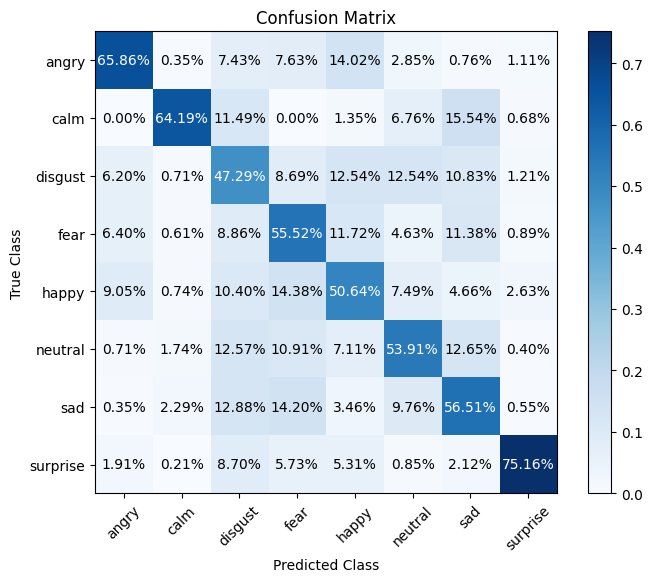

In [ ]:
# Predict the classes for test data
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
y_pred_probs = model.predict(x_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded test labels back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix as a percentage
cm = confusion_matrix(y_test_labels, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test_labels, y_pred)

# Print overall accuracy
print("Overall Accuracy:", overall_accuracy)

# Plot the confusion matrix as a heatmap with values
plt.figure(figsize=(8, 6))
plt.imshow(cm_percentage, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Set the tick labels to the class labels
class_labels = encoder.categories_[0].tolist()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add values to the plot
thresh = cm_percentage.max() / 2.
for i in range(cm_percentage.shape[0]):
    for j in range(cm_percentage.shape[1]):
        plt.text(j, i, "{:.2%}".format(cm_percentage[i, j]), ha="center", va="center", color="white" if cm_percentage[i, j] > thresh else "black")

plt.show()

#XGB

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import itertools

# Define the XGBoost classifier
clf = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Calculate the total number of iterations
total_iterations = len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['learning_rate'])

# Train the classifier on the training set with hyperparameter tuning
with tqdm(total=total_iterations) as pbar:
    for params in itertools.product(param_grid['n_estimators'], param_grid['max_depth'], param_grid['learning_rate']):
        clf.set_params(n_estimators=params[0], max_depth=params[1], learning_rate=params[2])
        clf.fit(x_train, y_train)
        pbar.update()


In [ ]:
# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Print the grid search results
print("Grid Search Results:")
print(grid_search.cv_results_)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)


In [ ]:
# Best parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}


In [ ]:
import xgboost as xgb

# Define the best parameters
best_params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}

# Instantiate the XGBoost classifier with the best parameters
clf = xgb.XGBClassifier(learning_rate=best_params['learning_rate'],
                        max_depth=best_params['max_depth'],
                        n_estimators=best_params['n_estimators'])

# Train the classifier on the training set
clf.fit(x_train, y_train)

# Evaluate the classifier on the test set
accuracy = clf.score(x_test, y_test)
print("Test accuracy:", accuracy)


Test accuracy: 0.4911203683402763


#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import itertools

# Define the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Calculate the total number of iterations
total_iterations = len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split'])

# Train the classifier on the training set with hyperparameter tuning
with tqdm(total=total_iterations) as pbar:
    for params in itertools.product(param_grid['n_estimators'], param_grid['max_depth'], param_grid['min_samples_split']):
        clf.set_params(n_estimators=params[0], max_depth=params[1], min_samples_split=params[2])
        clf.fit(x_train, y_train)
        pbar.update()



100%|██████████| 27/27 [16:44<00:00, 37.21s/it]


In [ ]:
# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best classifier and its parameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best classifier on the test set
accuracy = best_clf.score(x_test, y_test)

# Print the results
print("Best parameters:", best_params)
print("Test accuracy:", accuracy)


Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
Test accuracy: 0.2978513483885113


In [ ]:
# Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


# Evaluate the best classifier on the test set
y_pred = best_clf.predict(x_test)
accuracy = best_clf.score(x_test, y_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the confusion matrix as percentages
print("Confusion Matrix (as percentages):")
print(cm_percentage)

# Print the overall accuracy
print("Test Accuracy:", accuracy)


#BiLSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the function to create the Bidirectional LSTM model
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(162, 1)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(16)))
    model.add(Dense(8, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Reshape the input data to fit the LSTM layer
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Create the KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [50, 100, 150],
    'batch_size': [32,64, 128]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Parameters: ", grid_result.best_params_)




<ipython-input-15-bb7087271831>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/50
571/571 [==============================] - 33s 29ms/step - loss: 1.7143 - accuracy: 0.3082
Epoch 2/50
571/571 [==============================] - 16s 28ms/step - loss: 1.5533 - accuracy: 0.3715
Epoch 3/50
571/571 [==============================] - 16s 28ms/step - loss: 1.4894 - accuracy: 0.4012
Epoch 4/50
571/571 [==============================] - 16s 28ms/step - loss: 1.4281 - accuracy: 0.4324
Epoch 5/50
571/571 [==============================] - 16s 28ms/step - loss: 1.3885 - accuracy: 0.4455
Epoch 6/50
571/571 [==============================] - 16s 27ms/step - loss: 1.3573 - accuracy: 0.4602
Epoch 7/50
571/571 [==============================] - 16s 28ms/step - loss: 1.3269 - accuracy: 0.4698
Epoch 8/50
571/571 [==============================] - 16s 28ms/step - loss: 1.3113 - accuracy: 0.4770
Epoch 9/50
571/571 [==============================] - 16s 28ms/step - loss: 1.2905 - accuracy: 0.4859
Epoch 10/50
571/571 [==============================] - 16s 28ms/step - loss: 1.270

Epoch 1/50
571/571 [==============================] - 28s 29ms/step - loss: 1.7002 - accuracy: 0.3069
Epoch 2/50
571/571 [==============================] - 16s 28ms/step - loss: 1.5668 - accuracy: 0.3669
Epoch 3/50
571/571 [==============================] - 16s 28ms/step - loss: 1.5039 - accuracy: 0.4020
Epoch 4/50
571/571 [==============================] - 16s 29ms/step - loss: 1.4363 - accuracy: 0.4269
Epoch 5/50
571/571 [==============================] - 16s 29ms/step - loss: 1.4068 - accuracy: 0.4408
Epoch 6/50
571/571 [==============================] - 17s 30ms/step - loss: 1.3701 - accuracy: 0.4575
Epoch 7/50
571/571 [==============================] - 17s 29ms/step - loss: 1.3468 - accuracy: 0.4713
Epoch 8/50
571/571 [==============================] - 17s 29ms/step - loss: 1.3252 - accuracy: 0.4766
Epoch 9/50
571/571 [==============================] - 16s 29ms/step - loss: 1.3099 - accuracy: 0.4819
Epoch 10/50
571/571 [==============================] - 16s 29ms/step - loss: 1.293

Epoch 1/50
571/571 [==============================] - 26s 28ms/step - loss: 1.6933 - accuracy: 0.3146
Epoch 2/50
571/571 [==============================] - 16s 27ms/step - loss: 1.5687 - accuracy: 0.3612
Epoch 3/50
571/571 [==============================] - 15s 27ms/step - loss: 1.5044 - accuracy: 0.3932
Epoch 4/50
571/571 [==============================] - 16s 28ms/step - loss: 1.4392 - accuracy: 0.4231
Epoch 5/50
571/571 [==============================] - 16s 28ms/step - loss: 1.3967 - accuracy: 0.4413
Epoch 6/50
571/571 [==============================] - 16s 27ms/step - loss: 1.3635 - accuracy: 0.4575
Epoch 7/50
571/571 [==============================] - 16s 27ms/step - loss: 1.3440 - accuracy: 0.4655
Epoch 8/50
571/571 [==============================] - 16s 28ms/step - loss: 1.3206 - accuracy: 0.4744
Epoch 9/50
571/571 [==============================] - 16s 28ms/step - loss: 1.2903 - accuracy: 0.4870
Epoch 10/50
571/571 [==============================] - 16s 27ms/step - loss: 1.283

Epoch 1/50
571/571 [==============================] - 26s 29ms/step - loss: 1.7020 - accuracy: 0.3122
Epoch 2/50
571/571 [==============================] - 17s 29ms/step - loss: 1.5663 - accuracy: 0.3704
Epoch 3/50
571/571 [==============================] - 16s 29ms/step - loss: 1.4998 - accuracy: 0.4000
Epoch 4/50
571/571 [==============================] - 17s 29ms/step - loss: 1.4324 - accuracy: 0.4294
Epoch 5/50
571/571 [==============================] - 16s 29ms/step - loss: 1.3876 - accuracy: 0.4487
Epoch 6/50
571/571 [==============================] - 16s 29ms/step - loss: 1.3713 - accuracy: 0.4525
Epoch 7/50
571/571 [==============================] - 17s 29ms/step - loss: 1.3407 - accuracy: 0.4660
Epoch 8/50
571/571 [==============================] - 16s 29ms/step - loss: 1.3161 - accuracy: 0.4755
Epoch 9/50
571/571 [==============================] - 16s 29ms/step - loss: 1.2919 - accuracy: 0.4907
Epoch 10/50
571/571 [==============================] - 17s 29ms/step - loss: 1.284

Epoch 1/50
571/571 [==============================] - 26s 28ms/step - loss: 1.7129 - accuracy: 0.3043
Epoch 2/50
571/571 [==============================] - 16s 29ms/step - loss: 1.5886 - accuracy: 0.3538
Epoch 3/50
571/571 [==============================] - 17s 29ms/step - loss: 1.5163 - accuracy: 0.3938
Epoch 4/50
571/571 [==============================] - 17s 29ms/step - loss: 1.4597 - accuracy: 0.4206
Epoch 5/50
571/571 [==============================] - 17s 29ms/step - loss: 1.4174 - accuracy: 0.4406
Epoch 6/50
571/571 [==============================] - 16s 28ms/step - loss: 1.3797 - accuracy: 0.4582
Epoch 7/50
571/571 [==============================] - 16s 28ms/step - loss: 1.3467 - accuracy: 0.4715
Epoch 8/50
571/571 [==============================] - 16s 29ms/step - loss: 1.3231 - accuracy: 0.4794
Epoch 9/50
571/571 [==============================] - 17s 29ms/step - loss: 1.3085 - accuracy: 0.4823
Epoch 10/50
571/571 [==============================] - 16s 28ms/step - loss: 1.282

Epoch 1/50
571/571 [==============================] - 31s 35ms/step - loss: 1.7355 - accuracy: 0.2956
Epoch 2/50
571/571 [==============================] - 20s 35ms/step - loss: 1.6056 - accuracy: 0.3448
Epoch 3/50
571/571 [==============================] - 20s 35ms/step - loss: 1.5305 - accuracy: 0.3823
Epoch 4/50
571/571 [==============================] - 20s 34ms/step - loss: 1.4660 - accuracy: 0.4093
Epoch 5/50
571/571 [==============================] - 20s 35ms/step - loss: 1.4097 - accuracy: 0.4351
Epoch 6/50
571/571 [==============================] - 20s 34ms/step - loss: 1.3810 - accuracy: 0.4491
Epoch 7/50
571/571 [==============================] - 19s 34ms/step - loss: 1.3536 - accuracy: 0.4622
Epoch 8/50
571/571 [==============================] - 18s 32ms/step - loss: 1.3259 - accuracy: 0.4696
Epoch 9/50
571/571 [==============================] - 18s 32ms/step - loss: 1.3045 - accuracy: 0.4829
Epoch 10/50
571/571 [==============================] - 18s 32ms/step - loss: 1.295

Epoch 1/50
571/571 [==============================] - 30s 34ms/step - loss: 1.7067 - accuracy: 0.3108
Epoch 2/50
571/571 [==============================] - 19s 33ms/step - loss: 1.5844 - accuracy: 0.3590
Epoch 3/50
571/571 [==============================] - 19s 33ms/step - loss: 1.5181 - accuracy: 0.3884
Epoch 4/50
571/571 [==============================] - 18s 32ms/step - loss: 1.4906 - accuracy: 0.4030
Epoch 5/50
571/571 [==============================] - 18s 32ms/step - loss: 1.4208 - accuracy: 0.4368
Epoch 6/50
571/571 [==============================] - 18s 32ms/step - loss: 1.3885 - accuracy: 0.4512
Epoch 7/50
571/571 [==============================] - 18s 32ms/step - loss: 1.3502 - accuracy: 0.4655
Epoch 8/50
571/571 [==============================] - 18s 32ms/step - loss: 1.3289 - accuracy: 0.4725
Epoch 9/50
571/571 [==============================] - 17s 30ms/step - loss: 1.3047 - accuracy: 0.4866
Epoch 10/50
571/571 [==============================] - 17s 31ms/step - loss: 1.292

Epoch 1/50
571/571 [==============================] - 26s 30ms/step - loss: 1.6867 - accuracy: 0.3169
Epoch 2/50
571/571 [==============================] - 17s 29ms/step - loss: 1.5711 - accuracy: 0.3628
Epoch 3/50
571/571 [==============================] - 17s 29ms/step - loss: 1.4973 - accuracy: 0.3991
Epoch 4/50
571/571 [==============================] - 17s 30ms/step - loss: 1.4567 - accuracy: 0.4169
Epoch 5/50
571/571 [==============================] - 17s 29ms/step - loss: 1.4039 - accuracy: 0.4455
Epoch 6/50
571/571 [==============================] - 17s 29ms/step - loss: 1.3568 - accuracy: 0.4621
Epoch 7/50
571/571 [==============================] - 17s 30ms/step - loss: 1.3275 - accuracy: 0.4759
Epoch 8/50
571/571 [==============================] - 17s 30ms/step - loss: 1.3078 - accuracy: 0.4839
Epoch 9/50
571/571 [==============================] - 17s 29ms/step - loss: 1.2804 - accuracy: 0.4978
Epoch 10/50
571/571 [==============================] - 17s 30ms/step - loss: 1.263

Epoch 1/50
571/571 [==============================] - 26s 29ms/step - loss: 1.7150 - accuracy: 0.3000
Epoch 2/50
571/571 [==============================] - 16s 28ms/step - loss: 1.5743 - accuracy: 0.3583
Epoch 3/50
571/571 [==============================] - 17s 29ms/step - loss: 1.5135 - accuracy: 0.3882
Epoch 4/50
571/571 [==============================] - 16s 29ms/step - loss: 1.4471 - accuracy: 0.4241
Epoch 5/50
571/571 [==============================] - 16s 29ms/step - loss: 1.3916 - accuracy: 0.4444
Epoch 6/50
571/571 [==============================] - 17s 30ms/step - loss: 1.3576 - accuracy: 0.4582
Epoch 7/50
571/571 [==============================] - 17s 29ms/step - loss: 1.3319 - accuracy: 0.4702
Epoch 8/50
571/571 [==============================] - 16s 29ms/step - loss: 1.3046 - accuracy: 0.4836
Epoch 9/50
571/571 [==============================] - 17s 30ms/step - loss: 1.2741 - accuracy: 0.4934
Epoch 10/50
571/571 [==============================] - 17s 30ms/step - loss: 1.257

Epoch 1/100
571/571 [==============================] - 27s 30ms/step - loss: 1.7128 - accuracy: 0.3152
Epoch 2/100
571/571 [==============================] - 17s 29ms/step - loss: 1.5677 - accuracy: 0.3648
Epoch 3/100
571/571 [==============================] - 17s 29ms/step - loss: 1.4962 - accuracy: 0.3979
Epoch 4/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4389 - accuracy: 0.4223
Epoch 5/100
571/571 [==============================] - 17s 29ms/step - loss: 1.3910 - accuracy: 0.4381
Epoch 6/100
571/571 [==============================] - 17s 29ms/step - loss: 1.3590 - accuracy: 0.4558
Epoch 7/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3274 - accuracy: 0.4722
Epoch 8/100
571/571 [==============================] - 17s 29ms/step - loss: 1.3070 - accuracy: 0.4789
Epoch 9/100
571/571 [==============================] - 17s 29ms/step - loss: 1.2895 - accuracy: 0.4873
Epoch 10/100
571/571 [==============================] - 17s 30ms/step - l

Epoch 1/100
571/571 [==============================] - 29s 32ms/step - loss: 1.7148 - accuracy: 0.3027
Epoch 2/100
571/571 [==============================] - 17s 29ms/step - loss: 1.5907 - accuracy: 0.3526
Epoch 3/100
571/571 [==============================] - 16s 29ms/step - loss: 1.5057 - accuracy: 0.3980
Epoch 4/100
571/571 [==============================] - 16s 29ms/step - loss: 1.4419 - accuracy: 0.4297
Epoch 5/100
571/571 [==============================] - 17s 29ms/step - loss: 1.3974 - accuracy: 0.4455
Epoch 6/100
571/571 [==============================] - 16s 29ms/step - loss: 1.3841 - accuracy: 0.4519
Epoch 7/100
571/571 [==============================] - 16s 29ms/step - loss: 1.3416 - accuracy: 0.4694
Epoch 8/100
571/571 [==============================] - 17s 29ms/step - loss: 1.3143 - accuracy: 0.4840
Epoch 9/100
571/571 [==============================] - 17s 29ms/step - loss: 1.2986 - accuracy: 0.4895
Epoch 10/100
571/571 [==============================] - 17s 29ms/step - l

Epoch 1/100
571/571 [==============================] - 29s 32ms/step - loss: 1.7026 - accuracy: 0.3145
Epoch 2/100
571/571 [==============================] - 19s 32ms/step - loss: 1.5740 - accuracy: 0.3618
Epoch 3/100
571/571 [==============================] - 19s 33ms/step - loss: 1.5004 - accuracy: 0.4011
Epoch 4/100
571/571 [==============================] - 19s 33ms/step - loss: 1.4416 - accuracy: 0.4308
Epoch 5/100
571/571 [==============================] - 19s 34ms/step - loss: 1.3943 - accuracy: 0.4483
Epoch 6/100
571/571 [==============================] - 19s 33ms/step - loss: 1.3523 - accuracy: 0.4648
Epoch 7/100
571/571 [==============================] - 20s 35ms/step - loss: 1.3300 - accuracy: 0.4729
Epoch 8/100
571/571 [==============================] - 19s 33ms/step - loss: 1.3036 - accuracy: 0.4860
Epoch 9/100
571/571 [==============================] - 19s 33ms/step - loss: 1.2850 - accuracy: 0.4916
Epoch 10/100
571/571 [==============================] - 19s 33ms/step - l

Epoch 1/100
571/571 [==============================] - 29s 33ms/step - loss: 1.6915 - accuracy: 0.3188
Epoch 2/100
571/571 [==============================] - 18s 32ms/step - loss: 1.5595 - accuracy: 0.3687
Epoch 3/100
571/571 [==============================] - 17s 30ms/step - loss: 1.5013 - accuracy: 0.3968
Epoch 4/100
571/571 [==============================] - 18s 31ms/step - loss: 1.4325 - accuracy: 0.4290
Epoch 5/100
571/571 [==============================] - 18s 31ms/step - loss: 1.3956 - accuracy: 0.4457
Epoch 6/100
571/571 [==============================] - 18s 32ms/step - loss: 1.3582 - accuracy: 0.4603
Epoch 7/100
571/571 [==============================] - 19s 33ms/step - loss: 1.3347 - accuracy: 0.4713
Epoch 8/100
571/571 [==============================] - 18s 31ms/step - loss: 1.3134 - accuracy: 0.4796
Epoch 9/100
571/571 [==============================] - 18s 32ms/step - loss: 1.2987 - accuracy: 0.4853
Epoch 10/100
571/571 [==============================] - 18s 32ms/step - l

Epoch 1/100
571/571 [==============================] - 28s 31ms/step - loss: 1.7096 - accuracy: 0.3069
Epoch 2/100
571/571 [==============================] - 17s 30ms/step - loss: 1.5800 - accuracy: 0.3573
Epoch 3/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4987 - accuracy: 0.3991
Epoch 4/100
571/571 [==============================] - 18s 31ms/step - loss: 1.4452 - accuracy: 0.4296
Epoch 5/100
571/571 [==============================] - 17s 29ms/step - loss: 1.4034 - accuracy: 0.4445
Epoch 6/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3638 - accuracy: 0.4636
Epoch 7/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3378 - accuracy: 0.4786
Epoch 8/100
571/571 [==============================] - 17s 29ms/step - loss: 1.3123 - accuracy: 0.4823
Epoch 9/100
571/571 [==============================] - 17s 30ms/step - loss: 1.2955 - accuracy: 0.4910
Epoch 10/100
571/571 [==============================] - 18s 31ms/step - l

Epoch 1/100
571/571 [==============================] - 27s 30ms/step - loss: 1.7241 - accuracy: 0.3098
Epoch 2/100
571/571 [==============================] - 17s 30ms/step - loss: 1.5835 - accuracy: 0.3657
Epoch 3/100
571/571 [==============================] - 17s 30ms/step - loss: 1.5185 - accuracy: 0.3941
Epoch 4/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4556 - accuracy: 0.4175
Epoch 5/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4034 - accuracy: 0.4440
Epoch 6/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3626 - accuracy: 0.4588
Epoch 7/100
571/571 [==============================] - 17s 29ms/step - loss: 1.3273 - accuracy: 0.4714
Epoch 8/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3446 - accuracy: 0.4656
Epoch 9/100
571/571 [==============================] - 17s 30ms/step - loss: 1.2919 - accuracy: 0.4887
Epoch 10/100
571/571 [==============================] - 17s 30ms/step - l

Epoch 1/100
571/571 [==============================] - 28s 31ms/step - loss: 1.6994 - accuracy: 0.3063
Epoch 2/100
571/571 [==============================] - 18s 32ms/step - loss: 1.5716 - accuracy: 0.3607
Epoch 3/100
571/571 [==============================] - 17s 30ms/step - loss: 1.5659 - accuracy: 0.3699
Epoch 4/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4651 - accuracy: 0.4183
Epoch 5/100
571/571 [==============================] - 18s 32ms/step - loss: 1.4207 - accuracy: 0.4324
Epoch 6/100
571/571 [==============================] - 18s 32ms/step - loss: 1.3746 - accuracy: 0.4578
Epoch 7/100
571/571 [==============================] - 18s 32ms/step - loss: 1.3504 - accuracy: 0.4658
Epoch 8/100
571/571 [==============================] - 18s 31ms/step - loss: 1.3203 - accuracy: 0.4759
Epoch 9/100
571/571 [==============================] - 18s 31ms/step - loss: 1.2984 - accuracy: 0.4875
Epoch 10/100
571/571 [==============================] - 18s 31ms/step - l

Epoch 1/100
571/571 [==============================] - 27s 30ms/step - loss: 1.7048 - accuracy: 0.3089
Epoch 2/100
571/571 [==============================] - 17s 31ms/step - loss: 1.5640 - accuracy: 0.3712
Epoch 3/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4706 - accuracy: 0.4102
Epoch 4/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4183 - accuracy: 0.4395
Epoch 5/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3759 - accuracy: 0.4550
Epoch 6/100
571/571 [==============================] - 18s 31ms/step - loss: 1.3523 - accuracy: 0.4662
Epoch 7/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3198 - accuracy: 0.4741
Epoch 8/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3042 - accuracy: 0.4802
Epoch 9/100
571/571 [==============================] - 17s 30ms/step - loss: 1.2935 - accuracy: 0.4882
Epoch 10/100
571/571 [==============================] - 17s 30ms/step - l

Epoch 1/100
571/571 [==============================] - 27s 30ms/step - loss: 1.6949 - accuracy: 0.3087
Epoch 2/100
571/571 [==============================] - 17s 30ms/step - loss: 1.5703 - accuracy: 0.3605
Epoch 3/100
571/571 [==============================] - 17s 30ms/step - loss: 1.5084 - accuracy: 0.3894
Epoch 4/100
571/571 [==============================] - 17s 30ms/step - loss: 1.4466 - accuracy: 0.4222
Epoch 5/100
571/571 [==============================] - 17s 31ms/step - loss: 1.3962 - accuracy: 0.4497
Epoch 6/100
571/571 [==============================] - 17s 30ms/step - loss: 1.3592 - accuracy: 0.4629
Epoch 7/100
571/571 [==============================] - 17s 31ms/step - loss: 1.3495 - accuracy: 0.4677
Epoch 8/100
571/571 [==============================] - 17s 31ms/step - loss: 1.3088 - accuracy: 0.4854
Epoch 9/100
571/571 [==============================] - 17s 30ms/step - loss: 1.2887 - accuracy: 0.4903
Epoch 10/100
571/571 [==============================] - 18s 31ms/step - l

Epoch 1/150
571/571 [==============================] - 27s 30ms/step - loss: 1.6790 - accuracy: 0.3223
Epoch 2/150
571/571 [==============================] - 17s 29ms/step - loss: 1.5673 - accuracy: 0.3677
Epoch 3/150
571/571 [==============================] - 17s 29ms/step - loss: 1.5234 - accuracy: 0.3870
Epoch 4/150
571/571 [==============================] - 17s 29ms/step - loss: 1.5363 - accuracy: 0.3801
Epoch 5/150
571/571 [==============================] - 17s 30ms/step - loss: 1.4376 - accuracy: 0.4246
Epoch 6/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3884 - accuracy: 0.4472
Epoch 7/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3602 - accuracy: 0.4635
Epoch 8/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3347 - accuracy: 0.4710
Epoch 9/150
571/571 [==============================] - 16s 29ms/step - loss: 1.3127 - accuracy: 0.4799
Epoch 10/150
571/571 [==============================] - 17s 29ms/step - l

Epoch 1/150
571/571 [==============================] - 28s 31ms/step - loss: 1.7056 - accuracy: 0.3094
Epoch 2/150
571/571 [==============================] - 17s 30ms/step - loss: 1.5868 - accuracy: 0.3555
Epoch 3/150
571/571 [==============================] - 17s 30ms/step - loss: 1.5278 - accuracy: 0.3826
Epoch 4/150
571/571 [==============================] - 17s 30ms/step - loss: 1.4633 - accuracy: 0.4146
Epoch 5/150
571/571 [==============================] - 17s 30ms/step - loss: 1.4104 - accuracy: 0.4420
Epoch 6/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3651 - accuracy: 0.4613
Epoch 7/150
571/571 [==============================] - 17s 30ms/step - loss: 1.3425 - accuracy: 0.4670
Epoch 8/150
571/571 [==============================] - 17s 30ms/step - loss: 1.3181 - accuracy: 0.4816
Epoch 9/150
571/571 [==============================] - 17s 29ms/step - loss: 1.2949 - accuracy: 0.4903
Epoch 10/150
571/571 [==============================] - 17s 30ms/step - l

Epoch 1/150
571/571 [==============================] - 27s 30ms/step - loss: 1.7242 - accuracy: 0.3018
Epoch 2/150
571/571 [==============================] - 16s 29ms/step - loss: 1.5665 - accuracy: 0.3616
Epoch 3/150
571/571 [==============================] - 17s 29ms/step - loss: 1.4868 - accuracy: 0.4049
Epoch 4/150
571/571 [==============================] - 17s 29ms/step - loss: 1.4331 - accuracy: 0.4284
Epoch 5/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3936 - accuracy: 0.4492
Epoch 6/150
571/571 [==============================] - 18s 31ms/step - loss: 1.3571 - accuracy: 0.4620
Epoch 7/150
571/571 [==============================] - 17s 30ms/step - loss: 1.3310 - accuracy: 0.4730
Epoch 8/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3164 - accuracy: 0.4785
Epoch 9/150
571/571 [==============================] - 17s 30ms/step - loss: 1.2901 - accuracy: 0.4890
Epoch 10/150
571/571 [==============================] - 18s 31ms/step - l

Epoch 1/150
571/571 [==============================] - 27s 30ms/step - loss: 1.6960 - accuracy: 0.3063
Epoch 2/150
571/571 [==============================] - 17s 30ms/step - loss: 1.5767 - accuracy: 0.3533
Epoch 3/150
571/571 [==============================] - 17s 30ms/step - loss: 1.5054 - accuracy: 0.3897
Epoch 4/150
571/571 [==============================] - 17s 30ms/step - loss: 1.4603 - accuracy: 0.4151
Epoch 5/150
571/571 [==============================] - 17s 30ms/step - loss: 1.4137 - accuracy: 0.4404
Epoch 6/150
571/571 [==============================] - 17s 30ms/step - loss: 1.3745 - accuracy: 0.4605
Epoch 7/150
571/571 [==============================] - 17s 30ms/step - loss: 1.3405 - accuracy: 0.4681
Epoch 8/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3125 - accuracy: 0.4840
Epoch 9/150
571/571 [==============================] - 17s 30ms/step - loss: 1.2908 - accuracy: 0.4888
Epoch 10/150
571/571 [==============================] - 17s 30ms/step - l

Epoch 1/150
571/571 [==============================] - 28s 31ms/step - loss: 1.7228 - accuracy: 0.3032
Epoch 2/150
571/571 [==============================] - 17s 29ms/step - loss: 1.5760 - accuracy: 0.3638
Epoch 3/150
571/571 [==============================] - 17s 30ms/step - loss: 1.4878 - accuracy: 0.4094
Epoch 4/150
571/571 [==============================] - 18s 31ms/step - loss: 1.4302 - accuracy: 0.4346
Epoch 5/150
571/571 [==============================] - 17s 30ms/step - loss: 1.3913 - accuracy: 0.4518
Epoch 6/150
571/571 [==============================] - 18s 31ms/step - loss: 1.3548 - accuracy: 0.4681
Epoch 7/150
571/571 [==============================] - 18s 31ms/step - loss: 1.3293 - accuracy: 0.4803
Epoch 8/150
571/571 [==============================] - 18s 31ms/step - loss: 1.3147 - accuracy: 0.4819
Epoch 9/150
571/571 [==============================] - 19s 32ms/step - loss: 1.2961 - accuracy: 0.4903
Epoch 10/150
571/571 [==============================] - 18s 32ms/step - l

Epoch 1/150
571/571 [==============================] - 26s 29ms/step - loss: 1.6974 - accuracy: 0.3143
Epoch 2/150
571/571 [==============================] - 17s 29ms/step - loss: 1.5559 - accuracy: 0.3745
Epoch 3/150
571/571 [==============================] - 17s 30ms/step - loss: 1.4906 - accuracy: 0.4025
Epoch 4/150
571/571 [==============================] - 16s 29ms/step - loss: 1.4233 - accuracy: 0.4368
Epoch 5/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3753 - accuracy: 0.4526
Epoch 6/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3477 - accuracy: 0.4628
Epoch 7/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3229 - accuracy: 0.4743
Epoch 8/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3090 - accuracy: 0.4830
Epoch 9/150
571/571 [==============================] - 17s 29ms/step - loss: 1.2818 - accuracy: 0.4915
Epoch 10/150
571/571 [==============================] - 17s 29ms/step - l

Epoch 1/150
571/571 [==============================] - 26s 29ms/step - loss: 1.7074 - accuracy: 0.3100
Epoch 2/150
571/571 [==============================] - 17s 29ms/step - loss: 1.5726 - accuracy: 0.3684
Epoch 3/150
571/571 [==============================] - 16s 29ms/step - loss: 1.5030 - accuracy: 0.3987
Epoch 4/150
571/571 [==============================] - 17s 29ms/step - loss: 1.4380 - accuracy: 0.4235
Epoch 5/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3987 - accuracy: 0.4441
Epoch 6/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3701 - accuracy: 0.4590
Epoch 7/150
571/571 [==============================] - 16s 28ms/step - loss: 1.3414 - accuracy: 0.4673
Epoch 8/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3171 - accuracy: 0.4802
Epoch 9/150
571/571 [==============================] - 16s 28ms/step - loss: 1.2930 - accuracy: 0.4885
Epoch 10/150
571/571 [==============================] - 16s 28ms/step - l

Epoch 1/150
571/571 [==============================] - 30s 32ms/step - loss: 1.7062 - accuracy: 0.3059
Epoch 2/150
571/571 [==============================] - 17s 31ms/step - loss: 1.5716 - accuracy: 0.3614
Epoch 3/150
571/571 [==============================] - 18s 31ms/step - loss: 1.5199 - accuracy: 0.3811
Epoch 4/150
571/571 [==============================] - 18s 31ms/step - loss: 1.4726 - accuracy: 0.4024
Epoch 5/150
571/571 [==============================] - 18s 32ms/step - loss: 1.4331 - accuracy: 0.4313
Epoch 6/150
571/571 [==============================] - 18s 31ms/step - loss: 1.3846 - accuracy: 0.4526
Epoch 7/150
571/571 [==============================] - 18s 32ms/step - loss: 1.3554 - accuracy: 0.4619
Epoch 8/150
571/571 [==============================] - 17s 31ms/step - loss: 1.3219 - accuracy: 0.4780
Epoch 9/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3076 - accuracy: 0.4864
Epoch 10/150
571/571 [==============================] - 18s 31ms/step - l

Epoch 1/150
571/571 [==============================] - 26s 29ms/step - loss: 1.7088 - accuracy: 0.3018
Epoch 2/150
571/571 [==============================] - 16s 29ms/step - loss: 1.5807 - accuracy: 0.3565
Epoch 3/150
571/571 [==============================] - 17s 30ms/step - loss: 1.5016 - accuracy: 0.3954
Epoch 4/150
571/571 [==============================] - 16s 29ms/step - loss: 1.4306 - accuracy: 0.4370
Epoch 5/150
571/571 [==============================] - 17s 29ms/step - loss: 1.4071 - accuracy: 0.4435
Epoch 6/150
571/571 [==============================] - 17s 29ms/step - loss: 1.3565 - accuracy: 0.4636
Epoch 7/150
571/571 [==============================] - 17s 30ms/step - loss: 1.3252 - accuracy: 0.4721
Epoch 8/150
571/571 [==============================] - 16s 29ms/step - loss: 1.3003 - accuracy: 0.4885
Epoch 9/150
571/571 [==============================] - 17s 29ms/step - loss: 1.2929 - accuracy: 0.4877
Epoch 10/150
571/571 [==============================] - 17s 29ms/step - l

Epoch 1/50
286/286 [==============================] - 19s 31ms/step - loss: 1.7249 - accuracy: 0.3025
Epoch 2/50
286/286 [==============================] - 9s 30ms/step - loss: 1.5706 - accuracy: 0.3596
Epoch 3/50
286/286 [==============================] - 8s 28ms/step - loss: 1.5143 - accuracy: 0.3914
Epoch 4/50
286/286 [==============================] - 9s 30ms/step - loss: 1.4657 - accuracy: 0.4105
Epoch 5/50
286/286 [==============================] - 8s 29ms/step - loss: 1.4401 - accuracy: 0.4287
Epoch 6/50
286/286 [==============================] - 8s 29ms/step - loss: 1.3995 - accuracy: 0.4461
Epoch 7/50
286/286 [==============================] - 8s 30ms/step - loss: 1.3692 - accuracy: 0.4556
Epoch 8/50
286/286 [==============================] - 8s 29ms/step - loss: 1.3469 - accuracy: 0.4696
Epoch 9/50
286/286 [==============================] - 8s 29ms/step - loss: 1.3267 - accuracy: 0.4794
Epoch 10/50
286/286 [==============================] - 8s 30ms/step - loss: 1.3062 - accur

Epoch 1/50
286/286 [==============================] - 19s 29ms/step - loss: 1.7140 - accuracy: 0.3035
Epoch 2/50
286/286 [==============================] - 9s 30ms/step - loss: 1.5805 - accuracy: 0.3563
Epoch 3/50
286/286 [==============================] - 9s 30ms/step - loss: 1.5378 - accuracy: 0.3776
Epoch 4/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4852 - accuracy: 0.3991
Epoch 5/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4600 - accuracy: 0.4145
Epoch 6/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4195 - accuracy: 0.4313
Epoch 7/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3873 - accuracy: 0.4511
Epoch 8/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3598 - accuracy: 0.4594
Epoch 9/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3335 - accuracy: 0.4725
Epoch 10/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3180 - accur

Epoch 1/50
286/286 [==============================] - 19s 32ms/step - loss: 1.7162 - accuracy: 0.3106
Epoch 2/50
286/286 [==============================] - 9s 31ms/step - loss: 1.6085 - accuracy: 0.3476
Epoch 3/50
286/286 [==============================] - 8s 30ms/step - loss: 1.5321 - accuracy: 0.3800
Epoch 4/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4755 - accuracy: 0.4084
Epoch 5/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4473 - accuracy: 0.4232
Epoch 6/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3952 - accuracy: 0.4431
Epoch 7/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3658 - accuracy: 0.4549
Epoch 8/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3329 - accuracy: 0.4661
Epoch 9/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3131 - accuracy: 0.4776
Epoch 10/50
286/286 [==============================] - 9s 31ms/step - loss: 1.2915 - accur

Epoch 1/50
286/286 [==============================] - 19s 31ms/step - loss: 1.7355 - accuracy: 0.2990
Epoch 2/50
286/286 [==============================] - 9s 30ms/step - loss: 1.6016 - accuracy: 0.3518
Epoch 3/50
286/286 [==============================] - 9s 30ms/step - loss: 1.5380 - accuracy: 0.3776
Epoch 4/50
286/286 [==============================] - 9s 30ms/step - loss: 1.4896 - accuracy: 0.4013
Epoch 5/50
286/286 [==============================] - 9s 30ms/step - loss: 1.4441 - accuracy: 0.4243
Epoch 6/50
286/286 [==============================] - 8s 29ms/step - loss: 1.4183 - accuracy: 0.4392
Epoch 7/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3768 - accuracy: 0.4587
Epoch 8/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3573 - accuracy: 0.4674
Epoch 9/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3276 - accuracy: 0.4810
Epoch 10/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3128 - accur

Epoch 1/50
286/286 [==============================] - 19s 31ms/step - loss: 1.8302 - accuracy: 0.2661
Epoch 2/50
286/286 [==============================] - 9s 31ms/step - loss: 1.6580 - accuracy: 0.3201
Epoch 3/50
286/286 [==============================] - 8s 29ms/step - loss: 1.5839 - accuracy: 0.3491
Epoch 4/50
286/286 [==============================] - 9s 30ms/step - loss: 1.5139 - accuracy: 0.3879
Epoch 5/50
286/286 [==============================] - 9s 30ms/step - loss: 1.4707 - accuracy: 0.4075
Epoch 6/50
286/286 [==============================] - 8s 29ms/step - loss: 1.4305 - accuracy: 0.4295
Epoch 7/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3955 - accuracy: 0.4421
Epoch 8/50
286/286 [==============================] - 9s 32ms/step - loss: 1.3679 - accuracy: 0.4606
Epoch 9/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3409 - accuracy: 0.4688
Epoch 10/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3257 - accur

Epoch 1/50
286/286 [==============================] - 19s 31ms/step - loss: 1.7256 - accuracy: 0.3029
Epoch 2/50
286/286 [==============================] - 8s 29ms/step - loss: 1.5785 - accuracy: 0.3568
Epoch 3/50
286/286 [==============================] - 9s 31ms/step - loss: 1.5414 - accuracy: 0.3707
Epoch 4/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4774 - accuracy: 0.4021
Epoch 5/50
286/286 [==============================] - 9s 30ms/step - loss: 1.4466 - accuracy: 0.4190
Epoch 6/50
286/286 [==============================] - 9s 30ms/step - loss: 1.4064 - accuracy: 0.4335
Epoch 7/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3791 - accuracy: 0.4492
Epoch 8/50
286/286 [==============================] - 8s 29ms/step - loss: 1.3601 - accuracy: 0.4574
Epoch 9/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3612 - accuracy: 0.4572
Epoch 10/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3114 - accur

Epoch 1/50
286/286 [==============================] - 20s 32ms/step - loss: 1.7236 - accuracy: 0.3037
Epoch 2/50
286/286 [==============================] - 9s 32ms/step - loss: 1.5916 - accuracy: 0.3585
Epoch 3/50
286/286 [==============================] - 9s 31ms/step - loss: 1.5134 - accuracy: 0.3935
Epoch 4/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4665 - accuracy: 0.4160
Epoch 5/50
286/286 [==============================] - 9s 30ms/step - loss: 1.4395 - accuracy: 0.4291
Epoch 6/50
286/286 [==============================] - 8s 29ms/step - loss: 1.3759 - accuracy: 0.4536
Epoch 7/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3509 - accuracy: 0.4698
Epoch 8/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3374 - accuracy: 0.4722
Epoch 9/50
286/286 [==============================] - 8s 29ms/step - loss: 1.3279 - accuracy: 0.4745
Epoch 10/50
286/286 [==============================] - 9s 30ms/step - loss: 1.2920 - accur

Epoch 1/50
286/286 [==============================] - 19s 31ms/step - loss: 1.7438 - accuracy: 0.2925
Epoch 2/50
286/286 [==============================] - 9s 31ms/step - loss: 1.5949 - accuracy: 0.3564
Epoch 3/50
286/286 [==============================] - 8s 29ms/step - loss: 1.5399 - accuracy: 0.3750
Epoch 4/50
286/286 [==============================] - 9s 31ms/step - loss: 1.5576 - accuracy: 0.3748
Epoch 5/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4670 - accuracy: 0.4147
Epoch 6/50
286/286 [==============================] - 8s 29ms/step - loss: 1.4436 - accuracy: 0.4219
Epoch 7/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3968 - accuracy: 0.4471
Epoch 8/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3676 - accuracy: 0.4569
Epoch 9/50
286/286 [==============================] - 8s 29ms/step - loss: 1.3461 - accuracy: 0.4694
Epoch 10/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3418 - accur

Epoch 1/50
286/286 [==============================] - 20s 32ms/step - loss: 1.7415 - accuracy: 0.2940
Epoch 2/50
286/286 [==============================] - 9s 30ms/step - loss: 1.5974 - accuracy: 0.3488
Epoch 3/50
286/286 [==============================] - 9s 31ms/step - loss: 1.5255 - accuracy: 0.3829
Epoch 4/50
286/286 [==============================] - 9s 32ms/step - loss: 1.4827 - accuracy: 0.4063
Epoch 5/50
286/286 [==============================] - 9s 31ms/step - loss: 1.4274 - accuracy: 0.4318
Epoch 6/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3931 - accuracy: 0.4484
Epoch 7/50
286/286 [==============================] - 9s 32ms/step - loss: 1.3604 - accuracy: 0.4610
Epoch 8/50
286/286 [==============================] - 9s 31ms/step - loss: 1.3349 - accuracy: 0.4726
Epoch 9/50
286/286 [==============================] - 9s 30ms/step - loss: 1.3191 - accuracy: 0.4761
Epoch 10/50
286/286 [==============================] - 9s 32ms/step - loss: 1.3019 - accur

Epoch 1/100
286/286 [==============================] - 18s 30ms/step - loss: 1.7285 - accuracy: 0.3062
Epoch 2/100
286/286 [==============================] - 9s 30ms/step - loss: 1.5889 - accuracy: 0.3593
Epoch 3/100
286/286 [==============================] - 9s 30ms/step - loss: 1.5225 - accuracy: 0.3870
Epoch 4/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4520 - accuracy: 0.4211
Epoch 5/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4172 - accuracy: 0.4330
Epoch 6/100
286/286 [==============================] - 8s 29ms/step - loss: 1.3871 - accuracy: 0.4464
Epoch 7/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3642 - accuracy: 0.4588
Epoch 8/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3374 - accuracy: 0.4711
Epoch 9/100
286/286 [==============================] - 8s 29ms/step - loss: 1.3256 - accuracy: 0.4787
Epoch 10/100
286/286 [==============================] - 9s 31ms/step - loss: 1.30

Epoch 1/100
286/286 [==============================] - 21s 34ms/step - loss: 1.7449 - accuracy: 0.2953
Epoch 2/100
286/286 [==============================] - 9s 32ms/step - loss: 1.5874 - accuracy: 0.3563
Epoch 3/100
286/286 [==============================] - 9s 30ms/step - loss: 1.5151 - accuracy: 0.3915
Epoch 4/100
286/286 [==============================] - 9s 32ms/step - loss: 1.4589 - accuracy: 0.4221
Epoch 5/100
286/286 [==============================] - 9s 31ms/step - loss: 1.4167 - accuracy: 0.4336
Epoch 6/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3811 - accuracy: 0.4526
Epoch 7/100
286/286 [==============================] - 9s 31ms/step - loss: 1.3562 - accuracy: 0.4652
Epoch 8/100
286/286 [==============================] - 9s 33ms/step - loss: 1.3303 - accuracy: 0.4750
Epoch 9/100
286/286 [==============================] - 9s 31ms/step - loss: 1.3197 - accuracy: 0.4767
Epoch 10/100
286/286 [==============================] - 9s 30ms/step - loss: 1.29

Epoch 1/100
286/286 [==============================] - 19s 30ms/step - loss: 1.7480 - accuracy: 0.2958
Epoch 2/100
286/286 [==============================] - 9s 30ms/step - loss: 1.5893 - accuracy: 0.3547
Epoch 3/100
286/286 [==============================] - 8s 29ms/step - loss: 1.5178 - accuracy: 0.3931
Epoch 4/100
286/286 [==============================] - 9s 31ms/step - loss: 1.4618 - accuracy: 0.4148
Epoch 5/100
286/286 [==============================] - 9s 33ms/step - loss: 1.4147 - accuracy: 0.4366
Epoch 6/100
286/286 [==============================] - 9s 31ms/step - loss: 1.3822 - accuracy: 0.4513
Epoch 7/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3526 - accuracy: 0.4635
Epoch 8/100
286/286 [==============================] - 9s 32ms/step - loss: 1.3765 - accuracy: 0.4520
Epoch 9/100
286/286 [==============================] - 9s 31ms/step - loss: 1.3294 - accuracy: 0.4722
Epoch 10/100
286/286 [==============================] - 9s 30ms/step - loss: 1.30

Epoch 1/100
286/286 [==============================] - 19s 31ms/step - loss: 1.7593 - accuracy: 0.2899
Epoch 2/100
286/286 [==============================] - 8s 29ms/step - loss: 1.6133 - accuracy: 0.3460
Epoch 3/100
286/286 [==============================] - 8s 30ms/step - loss: 1.5599 - accuracy: 0.3759
Epoch 4/100
286/286 [==============================] - 9s 30ms/step - loss: 1.5111 - accuracy: 0.3997
Epoch 5/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4517 - accuracy: 0.4235
Epoch 6/100
286/286 [==============================] - 8s 30ms/step - loss: 1.4160 - accuracy: 0.4439
Epoch 7/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3843 - accuracy: 0.4518
Epoch 8/100
286/286 [==============================] - 8s 29ms/step - loss: 1.3567 - accuracy: 0.4655
Epoch 9/100
286/286 [==============================] - 8s 29ms/step - loss: 1.3792 - accuracy: 0.4565
Epoch 10/100
286/286 [==============================] - 9s 30ms/step - loss: 1.31

Epoch 1/100
286/286 [==============================] - 19s 30ms/step - loss: 1.7369 - accuracy: 0.2873
Epoch 2/100
286/286 [==============================] - 9s 31ms/step - loss: 1.5944 - accuracy: 0.3522
Epoch 3/100
286/286 [==============================] - 9s 32ms/step - loss: 1.5458 - accuracy: 0.3720
Epoch 4/100
286/286 [==============================] - 9s 31ms/step - loss: 1.5117 - accuracy: 0.3946
Epoch 5/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4623 - accuracy: 0.4185
Epoch 6/100
286/286 [==============================] - 8s 30ms/step - loss: 1.4128 - accuracy: 0.4418
Epoch 7/100
286/286 [==============================] - 8s 30ms/step - loss: 1.3922 - accuracy: 0.4458
Epoch 8/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3650 - accuracy: 0.4602
Epoch 9/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3493 - accuracy: 0.4704
Epoch 10/100
286/286 [==============================] - 9s 31ms/step - loss: 1.32

Epoch 1/100
286/286 [==============================] - 20s 32ms/step - loss: 1.7471 - accuracy: 0.2980
Epoch 2/100
286/286 [==============================] - 9s 31ms/step - loss: 1.5872 - accuracy: 0.3609
Epoch 3/100
286/286 [==============================] - 9s 31ms/step - loss: 1.5125 - accuracy: 0.3922
Epoch 4/100
286/286 [==============================] - 9s 32ms/step - loss: 1.4492 - accuracy: 0.4209
Epoch 5/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4156 - accuracy: 0.4316
Epoch 6/100
286/286 [==============================] - 9s 32ms/step - loss: 1.3858 - accuracy: 0.4465
Epoch 7/100
286/286 [==============================] - 9s 32ms/step - loss: 1.3891 - accuracy: 0.4467
Epoch 8/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3604 - accuracy: 0.4595
Epoch 9/100
286/286 [==============================] - 9s 31ms/step - loss: 1.3234 - accuracy: 0.4750
Epoch 10/100
286/286 [==============================] - 9s 33ms/step - loss: 1.29

Epoch 1/100
286/286 [==============================] - 19s 31ms/step - loss: 1.7318 - accuracy: 0.3036
Epoch 2/100
286/286 [==============================] - 8s 29ms/step - loss: 1.5939 - accuracy: 0.3592
Epoch 3/100
286/286 [==============================] - 9s 30ms/step - loss: 1.5178 - accuracy: 0.3914
Epoch 4/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4546 - accuracy: 0.4174
Epoch 5/100
286/286 [==============================] - 9s 31ms/step - loss: 1.4295 - accuracy: 0.4328
Epoch 6/100
286/286 [==============================] - 9s 31ms/step - loss: 1.3811 - accuracy: 0.4503
Epoch 7/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3584 - accuracy: 0.4580
Epoch 8/100
286/286 [==============================] - 8s 29ms/step - loss: 1.3389 - accuracy: 0.4707
Epoch 9/100
286/286 [==============================] - 9s 32ms/step - loss: 1.3191 - accuracy: 0.4789
Epoch 10/100
286/286 [==============================] - 9s 31ms/step - loss: 1.29

Epoch 1/100
286/286 [==============================] - 19s 32ms/step - loss: 1.7614 - accuracy: 0.2870
Epoch 2/100
286/286 [==============================] - 9s 31ms/step - loss: 1.6205 - accuracy: 0.3380
Epoch 3/100
286/286 [==============================] - 8s 29ms/step - loss: 1.5429 - accuracy: 0.3742
Epoch 4/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4945 - accuracy: 0.4022
Epoch 5/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4402 - accuracy: 0.4269
Epoch 6/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4149 - accuracy: 0.4347
Epoch 7/100
286/286 [==============================] - 8s 30ms/step - loss: 1.3769 - accuracy: 0.4533
Epoch 8/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3622 - accuracy: 0.4586
Epoch 9/100
286/286 [==============================] - 8s 28ms/step - loss: 1.3427 - accuracy: 0.4742
Epoch 10/100
286/286 [==============================] - 9s 30ms/step - loss: 1.34

Epoch 1/100
286/286 [==============================] - 19s 30ms/step - loss: 1.7310 - accuracy: 0.3001
Epoch 2/100
286/286 [==============================] - 8s 29ms/step - loss: 1.6102 - accuracy: 0.3431
Epoch 3/100
286/286 [==============================] - 8s 30ms/step - loss: 1.5397 - accuracy: 0.3745
Epoch 4/100
286/286 [==============================] - 9s 30ms/step - loss: 1.4790 - accuracy: 0.4060
Epoch 5/100
286/286 [==============================] - 8s 28ms/step - loss: 1.4293 - accuracy: 0.4300
Epoch 6/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3962 - accuracy: 0.4460
Epoch 7/100
286/286 [==============================] - 9s 30ms/step - loss: 1.3681 - accuracy: 0.4574
Epoch 8/100
286/286 [==============================] - 8s 29ms/step - loss: 1.3534 - accuracy: 0.4617
Epoch 9/100
286/286 [==============================] - 8s 30ms/step - loss: 1.3301 - accuracy: 0.4740
Epoch 10/100
286/286 [==============================] - 9s 30ms/step - loss: 1.31

Epoch 1/150
286/286 [==============================] - 19s 31ms/step - loss: 1.7295 - accuracy: 0.3068
Epoch 2/150
286/286 [==============================] - 9s 31ms/step - loss: 1.5783 - accuracy: 0.3637
Epoch 3/150
286/286 [==============================] - 9s 32ms/step - loss: 1.5162 - accuracy: 0.3826
Epoch 4/150
286/286 [==============================] - 9s 31ms/step - loss: 1.4753 - accuracy: 0.4060
Epoch 5/150
286/286 [==============================] - 9s 30ms/step - loss: 1.4459 - accuracy: 0.4191
Epoch 6/150
286/286 [==============================] - 9s 31ms/step - loss: 1.3993 - accuracy: 0.4439
Epoch 7/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3783 - accuracy: 0.4476
Epoch 8/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3631 - accuracy: 0.4585
Epoch 9/150
286/286 [==============================] - 9s 32ms/step - loss: 1.3407 - accuracy: 0.4684
Epoch 10/150
286/286 [==============================] - 9s 31ms/step - loss: 1.31

Epoch 1/150
286/286 [==============================] - 19s 32ms/step - loss: 1.7341 - accuracy: 0.2970
Epoch 2/150
286/286 [==============================] - 8s 28ms/step - loss: 1.6005 - accuracy: 0.3459
Epoch 3/150
286/286 [==============================] - 9s 30ms/step - loss: 1.5406 - accuracy: 0.3806
Epoch 4/150
286/286 [==============================] - 8s 30ms/step - loss: 1.4819 - accuracy: 0.4043
Epoch 5/150
286/286 [==============================] - 8s 29ms/step - loss: 1.4588 - accuracy: 0.4221
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.4099 - accuracy: 0.4424
Epoch 7/150
286/286 [==============================] - 8s 30ms/step - loss: 1.3958 - accuracy: 0.4490
Epoch 8/150
286/286 [==============================] - 8s 28ms/step - loss: 1.3565 - accuracy: 0.4645
Epoch 9/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3337 - accuracy: 0.4784
Epoch 10/150
286/286 [==============================] - 9s 30ms/step - loss: 1.32

Epoch 1/150
286/286 [==============================] - 20s 32ms/step - loss: 1.7333 - accuracy: 0.3040
Epoch 2/150
286/286 [==============================] - 9s 32ms/step - loss: 1.5867 - accuracy: 0.3544
Epoch 3/150
286/286 [==============================] - 9s 31ms/step - loss: 1.5303 - accuracy: 0.3811
Epoch 4/150
286/286 [==============================] - 9s 32ms/step - loss: 1.4759 - accuracy: 0.4097
Epoch 5/150
286/286 [==============================] - 9s 32ms/step - loss: 1.4308 - accuracy: 0.4285
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3928 - accuracy: 0.4455
Epoch 7/150
286/286 [==============================] - 9s 32ms/step - loss: 1.3643 - accuracy: 0.4581
Epoch 8/150
286/286 [==============================] - 9s 32ms/step - loss: 1.3407 - accuracy: 0.4675
Epoch 9/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3280 - accuracy: 0.4760
Epoch 10/150
286/286 [==============================] - 9s 31ms/step - loss: 1.29

Epoch 1/150
286/286 [==============================] - 19s 31ms/step - loss: 1.7334 - accuracy: 0.2896
Epoch 2/150
286/286 [==============================] - 8s 29ms/step - loss: 1.5968 - accuracy: 0.3475
Epoch 3/150
286/286 [==============================] - 9s 31ms/step - loss: 1.5294 - accuracy: 0.3779
Epoch 4/150
286/286 [==============================] - 9s 31ms/step - loss: 1.4741 - accuracy: 0.4127
Epoch 5/150
286/286 [==============================] - 8s 29ms/step - loss: 1.4147 - accuracy: 0.4405
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3920 - accuracy: 0.4490
Epoch 7/150
286/286 [==============================] - 9s 31ms/step - loss: 1.3593 - accuracy: 0.4656
Epoch 8/150
286/286 [==============================] - 8s 29ms/step - loss: 1.3423 - accuracy: 0.4704
Epoch 9/150
286/286 [==============================] - 9s 31ms/step - loss: 1.3101 - accuracy: 0.4820
Epoch 10/150
286/286 [==============================] - 9s 31ms/step - loss: 1.29

Epoch 1/150
286/286 [==============================] - 20s 32ms/step - loss: 1.7445 - accuracy: 0.2886
Epoch 2/150
286/286 [==============================] - 8s 30ms/step - loss: 1.6013 - accuracy: 0.3457
Epoch 3/150
286/286 [==============================] - 9s 31ms/step - loss: 1.5276 - accuracy: 0.3843
Epoch 4/150
286/286 [==============================] - 9s 31ms/step - loss: 1.4699 - accuracy: 0.4129
Epoch 5/150
286/286 [==============================] - 9s 31ms/step - loss: 1.4212 - accuracy: 0.4351
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3933 - accuracy: 0.4486
Epoch 7/150
286/286 [==============================] - 9s 31ms/step - loss: 1.3617 - accuracy: 0.4632
Epoch 8/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3472 - accuracy: 0.4670
Epoch 9/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3468 - accuracy: 0.4705
Epoch 10/150
286/286 [==============================] - 9s 31ms/step - loss: 1.30

Epoch 1/150
286/286 [==============================] - 19s 31ms/step - loss: 1.7265 - accuracy: 0.2912
Epoch 2/150
286/286 [==============================] - 9s 30ms/step - loss: 1.5732 - accuracy: 0.3559
Epoch 3/150
286/286 [==============================] - 9s 31ms/step - loss: 1.5121 - accuracy: 0.3829
Epoch 4/150
286/286 [==============================] - 8s 30ms/step - loss: 1.4609 - accuracy: 0.4134
Epoch 5/150
286/286 [==============================] - 9s 31ms/step - loss: 1.4206 - accuracy: 0.4272
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3920 - accuracy: 0.4445
Epoch 7/150
286/286 [==============================] - 8s 29ms/step - loss: 1.3662 - accuracy: 0.4548
Epoch 8/150
286/286 [==============================] - 8s 30ms/step - loss: 1.3428 - accuracy: 0.4652
Epoch 9/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3153 - accuracy: 0.4753
Epoch 10/150
286/286 [==============================] - 8s 28ms/step - loss: 1.30

Epoch 1/150
286/286 [==============================] - 19s 31ms/step - loss: 1.7245 - accuracy: 0.3078
Epoch 2/150
286/286 [==============================] - 8s 29ms/step - loss: 1.5876 - accuracy: 0.3616
Epoch 3/150
286/286 [==============================] - 9s 31ms/step - loss: 1.5294 - accuracy: 0.3880
Epoch 4/150
286/286 [==============================] - 8s 30ms/step - loss: 1.4751 - accuracy: 0.4165
Epoch 5/150
286/286 [==============================] - 8s 29ms/step - loss: 1.4276 - accuracy: 0.4333
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3905 - accuracy: 0.4473
Epoch 7/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3604 - accuracy: 0.4610
Epoch 8/150
286/286 [==============================] - 8s 29ms/step - loss: 1.3568 - accuracy: 0.4583
Epoch 9/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3230 - accuracy: 0.4780
Epoch 10/150
286/286 [==============================] - 9s 30ms/step - loss: 1.39

Epoch 1/150
286/286 [==============================] - 19s 31ms/step - loss: 1.7313 - accuracy: 0.2980
Epoch 2/150
286/286 [==============================] - 8s 29ms/step - loss: 1.5776 - accuracy: 0.3611
Epoch 3/150
286/286 [==============================] - 8s 30ms/step - loss: 1.5172 - accuracy: 0.3853
Epoch 4/150
286/286 [==============================] - 9s 30ms/step - loss: 1.4674 - accuracy: 0.4100
Epoch 5/150
286/286 [==============================] - 8s 29ms/step - loss: 1.4335 - accuracy: 0.4247
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.3935 - accuracy: 0.4446
Epoch 7/150
286/286 [==============================] - 8s 30ms/step - loss: 1.3650 - accuracy: 0.4591
Epoch 8/150
286/286 [==============================] - 8s 29ms/step - loss: 1.3442 - accuracy: 0.4660
Epoch 9/150
286/286 [==============================] - 8s 30ms/step - loss: 1.3164 - accuracy: 0.4809
Epoch 10/150
286/286 [==============================] - 8s 30ms/step - loss: 1.29

Epoch 1/150
286/286 [==============================] - 19s 30ms/step - loss: 1.7477 - accuracy: 0.2914
Epoch 2/150
286/286 [==============================] - 8s 28ms/step - loss: 1.5895 - accuracy: 0.3433
Epoch 3/150
286/286 [==============================] - 9s 30ms/step - loss: 1.5305 - accuracy: 0.3737
Epoch 4/150
286/286 [==============================] - 8s 30ms/step - loss: 1.4956 - accuracy: 0.3934
Epoch 5/150
286/286 [==============================] - 8s 29ms/step - loss: 1.4472 - accuracy: 0.4205
Epoch 6/150
286/286 [==============================] - 9s 30ms/step - loss: 1.4144 - accuracy: 0.4368
Epoch 7/150
286/286 [==============================] - 8s 29ms/step - loss: 1.3830 - accuracy: 0.4465
Epoch 8/150
286/286 [==============================] - 8s 29ms/step - loss: 1.3599 - accuracy: 0.4570
Epoch 9/150
286/286 [==============================] - 8s 29ms/step - loss: 1.3337 - accuracy: 0.4680
Epoch 10/150
286/286 [==============================] - 8s 30ms/step - loss: 1.32

In [ ]:
# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
loss, accuracy = best_model.evaluate(x_test, y_test, batch_size=32)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
# from tensorflow.keras.models import Sequential

# # Define the Bidirectional LSTM model
# model = Sequential()
# model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(162, 1)))
# model.add(Dropout(0.2)) # Add dropout regularization
# model.add(Bidirectional(LSTM(32, return_sequences=True)))
# model.add(Dropout(0.2)) # Add dropout regularization
# model.add(Bidirectional(LSTM(16)))
# model.add(Dense(8, activation='softmax'))

# # Compile the model with a learning rate of 0.01
# optimizer = tf.keras.optimizers.Adam(lr=0.1) # Change the learning rate
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# # Reshape the input data to fit the LSTM layer
# x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# # Train the model
# model.fit(x_train, y_train, epochs=150, batch_size=128)

# # Evaluate the model on the test set
# x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
# loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
# print("Test loss:", loss)
# print("Test accuracy:", accuracy)


Epoch 1/150
214/214 [==============================] - 23s 33ms/step - loss: 1.7199 - accuracy: 0.3049
Epoch 2/150
214/214 [==============================] - 7s 33ms/step - loss: 1.5743 - accuracy: 0.3612
Epoch 3/150
214/214 [==============================] - 7s 34ms/step - loss: 1.4932 - accuracy: 0.3957
Epoch 4/150
214/214 [==============================] - 7s 32ms/step - loss: 1.4594 - accuracy: 0.4117
Epoch 5/150
214/214 [==============================] - 7s 35ms/step - loss: 1.4000 - accuracy: 0.4389
Epoch 6/150
214/214 [==============================] - 8s 35ms/step - loss: 1.3658 - accuracy: 0.4517
Epoch 7/150
214/214 [==============================] - 8s 36ms/step - loss: 1.3329 - accuracy: 0.4699
Epoch 8/150
214/214 [==============================] - 7s 32ms/step - loss: 1.3096 - accuracy: 0.4810
Epoch 9/150
214/214 [==============================] - 7s 33ms/step - loss: 1.2841 - accuracy: 0.4885
Epoch 10/150
214/214 [==============================] - 7s 33ms/step - loss: 1.27

#Tryouts

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout,BatchNormalization,GlobalAveragePooling1D


# # Define the BLSTM model architecture

# model = Sequential()
# model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(64)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(8, activation='softmax'))

# Define the CNN model architecture

# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
# model.add(GlobalAveragePooling1D())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(8, activation='softmax'))

# Define the more advanced CNN model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))



# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))



Epoch 1/100
428/428 [==============================] - 20s 23ms/step - loss: 1.7331 - accuracy: 0.3426 - val_loss: 1.8647 - val_accuracy: 0.2934
Epoch 2/100
428/428 [==============================] - 6s 15ms/step - loss: 1.3921 - accuracy: 0.4509 - val_loss: 1.5226 - val_accuracy: 0.4214
Epoch 3/100
428/428 [==============================] - 7s 17ms/step - loss: 1.2818 - accuracy: 0.4900 - val_loss: 1.4535 - val_accuracy: 0.4708
Epoch 4/100
428/428 [==============================] - 6s 15ms/step - loss: 1.2324 - accuracy: 0.5101 - val_loss: 4.4848 - val_accuracy: 0.3261
Epoch 5/100
428/428 [==============================] - 8s 18ms/step - loss: 1.1930 - accuracy: 0.5279 - val_loss: 1.2864 - val_accuracy: 0.4905
Epoch 6/100
428/428 [==============================] - 6s 15ms/step - loss: 1.1537 - accuracy: 0.5485 - val_loss: 2.2529 - val_accuracy: 0.4181
Epoch 7/100
428/428 [==============================] - 7s 17ms/step - loss: 1.1247 - accuracy: 0.5577 - val_loss: 2.4128 - val_accuracy

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


286/286 [==============================] - 4s 13ms/step - loss: 1.5823 - accuracy: 0.5630
Test Loss: 1.5822912454605103
Test Accuracy: 0.5630344152450562


286/286 [==============================] - 5s 13ms/step


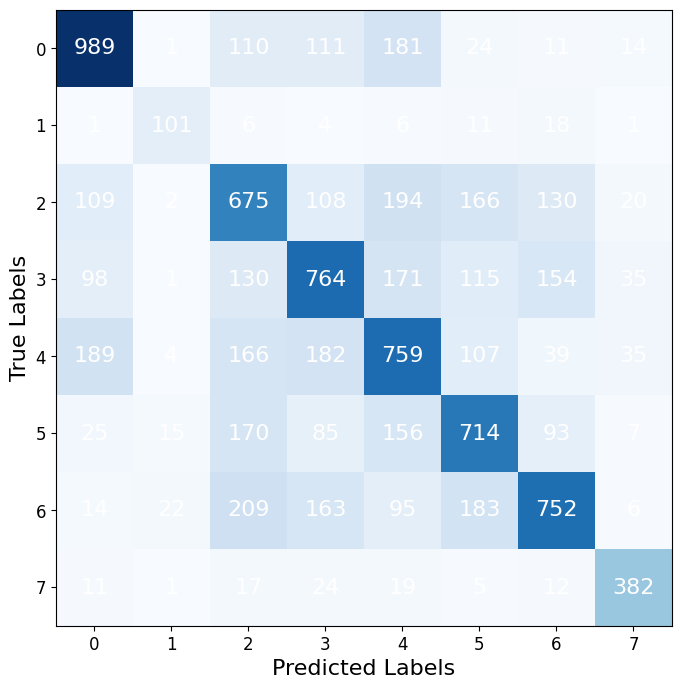

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(x_test)

# Convert the predictions to one-hot encoded labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# # Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix, cmap='Blues')

# Add labels to the plot
ax.set_xlabel('Predicted Labels', fontsize=16)
ax.set_ylabel('True Labels', fontsize=16)
ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_yticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(list(range(8)), fontsize=12)
ax.set_yticklabels(list(range(8)), fontsize=12)

# Add the values to the plot
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white', fontsize=16)

plt.show()


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

# Generate predictions on the test set
y_pred = model.predict(x_test)

# Convert the predictions to one-hot encoded labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Compute precision, recall, and F1 score
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



286/286 [==============================] - 2s 4ms/step
Precision: 0.6795297268844495
Recall: 0.5759701819776365
F1 Score: 0.5781481145796732


286/286 [==============================] - 1s 3ms/step


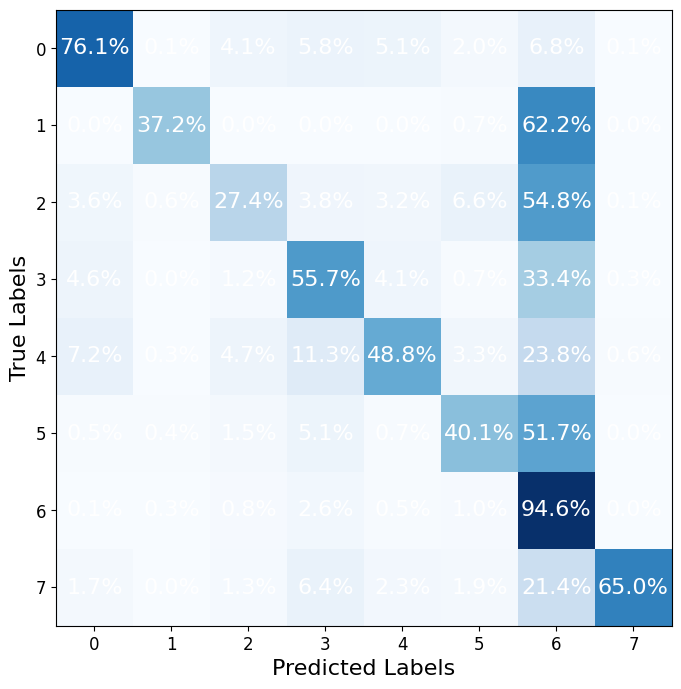

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(x_test)

# Convert the predictions to one-hot encoded labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Convert the confusion matrix to percentages
conf_matrix_pct = np.round(100*conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=1)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix_pct, cmap='Blues')

# Add labels to the plot
ax.set_xlabel('Predicted Labels', fontsize=16)
ax.set_ylabel('True Labels', fontsize=16)
ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_yticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(list(range(8)), fontsize=12)
ax.set_yticklabels(list(range(8)), fontsize=12)

# Add the values to the plot
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        ax.text(j, i, str(conf_matrix_pct[i, j])+'%', ha='center', va='center', color='white', fontsize=16)

plt.show()


#Webapp

In [ ]:
# !pip install streamlit

In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from keras.models import load_model
import librosa

# Load the saved model
model = load_model('best_model.h5')

# Constants for audio recording and processing
fs = 22050  # Sampling frequency (22.05kHz)
duration = 10  # Maximum recording duration in seconds



In [ ]:
# Function to extract audio features
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=fs).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=fs).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=fs).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result

In [ ]:
# Function to preprocess the audio data
def preprocess_audio(audio):
    # Resample audio to the required sampling frequency
    audio_resampled = librosa.resample(audio, orig_sr=audio.shape[0], target_sr=fs)

    # Extract audio features
    audio_features = extract_features(audio_resampled)

    return audio_features


In [ ]:
# Function to make emotion predictions
def predict_emotion(audio):
    processed_audio = preprocess_audio(audio)
    predictions = model.predict(processed_audio[np.newaxis, :])
    predicted_label = np.argmax(predictions) + 1  # Adding 1 to match emotion labels
    return predicted_label

In [ ]:
# Streamlit web app
def main():
    # Set app title
    st.title("Emotion Recognition Web App")

    # Add instructions
    st.write("Click the 'Start Recording' button to record your speech (maximum 10 seconds).")

    # Start recording on button click
    if st.button("Start Recording"):
        # Record audio for the specified duration
        audio = st.audio_recorder(duration=duration, sample_rate=fs, channels=1)
        with audio:
            st.write("Recording...")

        # Access the recorded audio data
        audio_data = np.array(audio.data)

        # Predict emotion
        predicted_label = predict_emotion(audio_data)

        # Emotion mapping
        emotions = {
            0: 'neutral',
            1: 'calm',
            2: 'happy',
            3: 'sad',
            4: 'angry',
            5: 'fearful',
            6: 'disgust',
            7: 'surprised'
        }

        # Display the predicted emotion label
        st.write("Predicted Emotion:")
        st.write(emotions[predicted_label])

if __name__ == '__main__':
    main()


In [ ]:
# !pip install streamlit pyngrok

In [ ]:
from pyngrok import ngrok
from subprocess import Popen

# Start ngrok tunnel
proc = Popen(["streamlit", "run", "app.py"])
public_url = ngrok.connect(addr="8501")
public_url


<NgrokTunnel: "https://7d27-35-247-145-203.ngrok.io" -> "http://localhost:8501">